# Smart Predictive Modeling for RentalProperty Prices:

# Problem Statement:
In the real estate industry, determining the appropriate rental price for a property is crucial for
property owners, tenants, and property management companies. Accurate rent predictions can
help landlords set competitive prices, tenants make informed rental decisions, and property
management companies optimize their portfolio management.
The goal of this project is to develop a data-driven model that predicts the rental price of
residential properties based on relevant features. By analyzing historical rental data and
property attributes, the model aims to provide accurate and reliable rent predictions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json
from sklearn.preprocessing import OneHotEncoder
import warnings


warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
rent = pd.read_excel("C:\\Users\\User\\Downloads\\House_Rent_Train.xlsx")

In [3]:
rent

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20550,19,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20551,20,BHK2,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20552,21,BHK2,NaN,NaN,NaN,NaN,NaN,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20553,22,BHK2,NaN,NaN,NaN,NaN,NaN,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#checking the null values in dataset
rent.isnull().sum()

id                   0
type                27
locality           160
activation_date     23
latitude            23
longitude           23
lease_type          23
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age        23
bathroom            23
facing              23
cup_board           23
floor               23
total_floor         23
amenities           23
water_supply        23
building_type       23
balconies           23
rent                23
dtype: int64

In [109]:
# checking the dataset shape
rent.shape

(20555, 26)

In [6]:
# checking the dataset datatypes.
rent.dtypes

id                  object
type                object
locality            object
activation_date     object
latitude           float64
longitude          float64
lease_type          object
gym                  int64
lift                 int64
swimming_pool        int64
negotiable           int64
furnishing          object
parking             object
property_size        int64
property_age       float64
bathroom           float64
facing              object
cup_board          float64
floor              float64
total_floor        float64
amenities           object
water_supply        object
building_type       object
balconies          float64
rent               float64
dtype: object

In [7]:
rent['id'].nunique()

20523

In [8]:
# id columns have 99.8% unique values, so drop the column
rent.drop(['id'],axis=1,inplace = True) 

In [9]:
#rent['amenities'].unique()

In [10]:
rent.shape

(20555, 24)

In [11]:
rent

,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,0,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,1,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,1,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,1,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20550,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20551,BHK2,NaN,NaN,NaN,NaN,NaN,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20552,BHK2,NaN,NaN,NaN,NaN,NaN,1,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20553,BHK2,NaN,NaN,NaN,NaN,NaN,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# basic descriptive analysis:
rent.describe()

,latitude,longitude,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,floor,total_floor,balconies,rent
count,20532.000000,20532.000000,20555.000000,20555.000000,20555.000000,20555.000000,20555.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000,20532.000000
mean,12.945748,77.637295,0.227049,0.362053,0.174848,0.711603,1062.017465,5.769920,1.858465,4.549922,1.874050,3.801335,1.149523,19056.733148
std,0.029601,0.110525,0.418935,0.480606,0.379846,0.453028,591.207446,6.350989,0.710926,335.154787,2.183982,3.183697,0.993549,8434.029016
min,12.900004,77.500072,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8000.000000
25%,12.918176,77.572068,0.000000,0.000000,0.000000,0.000000,700.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,12500.000000
50%,12.943790,77.633506,0.000000,0.000000,0.000000,1.000000,1047.000000,5.000000,2.000000,2.000000,1.000000,3.000000,1.000000,17500.000000
75%,12.970979,77.695723,0.000000,1.000000,0.000000,1.000000,1285.000000,10.000000,2.000000,3.000000,2.000000,4.000000,2.000000,24000.000000
max,12.999999,80.266346,1.000000,1.000000,1.000000,1.000000,50000.000000,400.000000,21.000000,48026.000000,25.000000,26.000000,13.000000,50000.000000


In [13]:
# handling null values implies mean 
rent['latitude'] = rent['latitude'].fillna(rent['latitude'].mean())
rent['longitude'] = rent['longitude'].fillna(rent['longitude'].mean())
rent['property_age'] = rent['property_age'].fillna(rent['property_age'].mean())
rent['bathroom'] = rent['bathroom'].fillna(rent['bathroom'].mean())
rent['cup_board'] = rent['cup_board'].fillna(rent['cup_board'].mean())
rent['floor'] = rent['floor'].fillna(rent['floor'].mean())
rent['total_floor'] = rent['total_floor'].fillna(rent['total_floor'].mean())
rent['balconies'] = rent['balconies'].fillna(rent['balconies'].mean())
rent['rent'] = rent['rent'].fillna(rent['rent'].mean())

In [14]:
# handling null values implies mean and mode
rent['type'] = rent['type'].fillna(rent['type'].mode().iloc[0])
rent['locality'] = rent['locality'].fillna(rent['locality'].mode().iloc[0])
rent['activation_date'] = rent['activation_date'].fillna(rent['activation_date'].mode().iloc[0])
rent['lease_type'] = rent['lease_type'].fillna(rent['lease_type'].mode().iloc[0])
rent['facing'] = rent['facing'].fillna(rent['facing'].mode().iloc[0])
rent['amenities'] = rent['amenities'].fillna(rent['amenities'].mode().iloc[0])
rent['water_supply'] = rent['water_supply'].fillna(rent['water_supply'].mode().iloc[0])
rent['building_type'] = rent['building_type'].fillna(rent['building_type'].mode().iloc[0])


In [15]:
rent.isnull().sum()

type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
rent               0
dtype: int64

In [16]:
rent.shape

(20555, 24)

In [17]:

# data type convertion date column split into day, month, year columns

rent['activation_date']= pd.to_datetime(rent['activation_date'], errors='coerce')
rent['activation_year'] = rent['activation_date'].dt.year
rent['activation_month'] = rent['activation_date'].dt.month
rent['activation_day'] = rent['activation_date'].dt.day

In [18]:
# spliting feature Datatype wise.
numerical = [feature for feature in rent.columns if rent[feature].dtype != 'O']
catagrical =[feature for feature in rent.columns if rent[feature].dtype == 'O']

In [19]:
catagrical

['type',
 'locality',
 'lease_type',
 'furnishing',
 'parking',
 'facing',
 'amenities',
 'water_supply',
 'building_type']

In [20]:
numerical

['activation_date',
 'latitude',
 'longitude',
 'gym',
 'lift',
 'swimming_pool',
 'negotiable',
 'property_size',
 'property_age',
 'bathroom',
 'cup_board',
 'floor',
 'total_floor',
 'balconies',
 'rent',
 'activation_year',
 'activation_month',
 'activation_day']

# EDA PART:

1.Univariate Analysis:

In [21]:
def plot(rent,column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=rent, x=column)
    plt.title(f'Box Plot for {column}')
    
    plt.subplot(1,3,2)
    sns.histplot(data=rent, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')
    
    

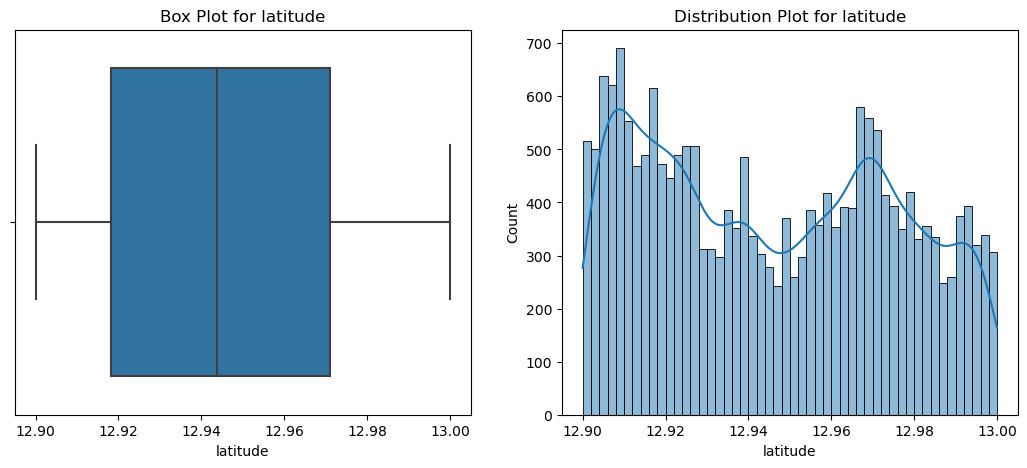

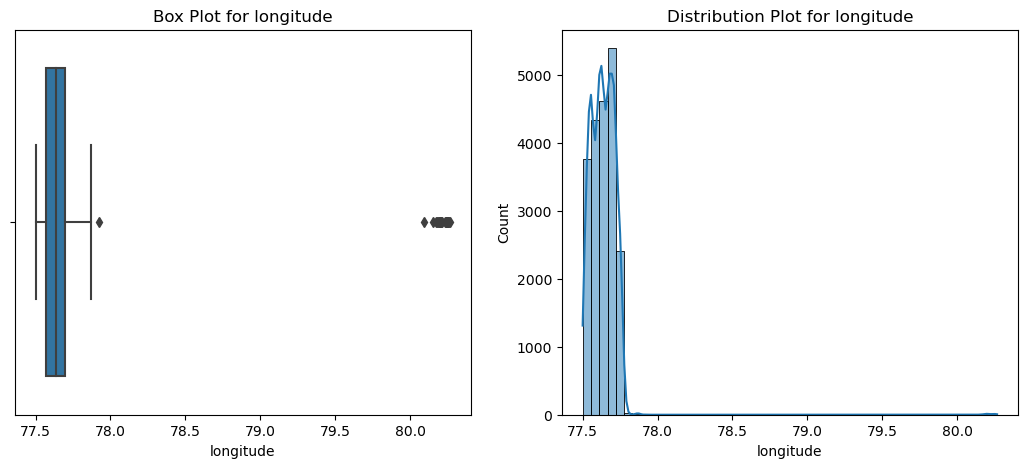

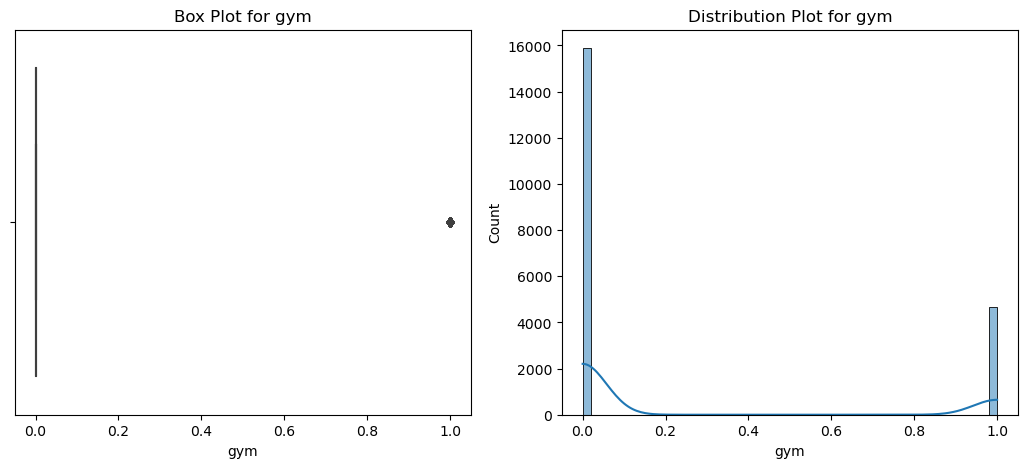

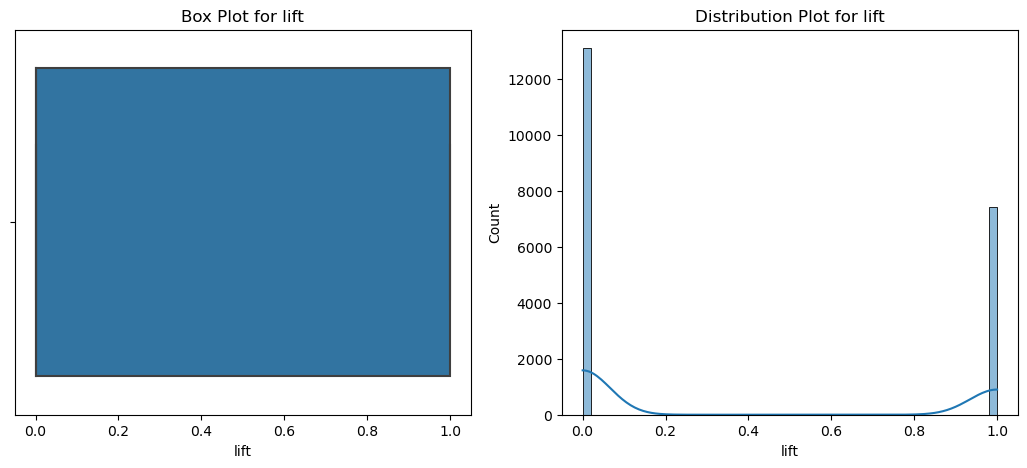

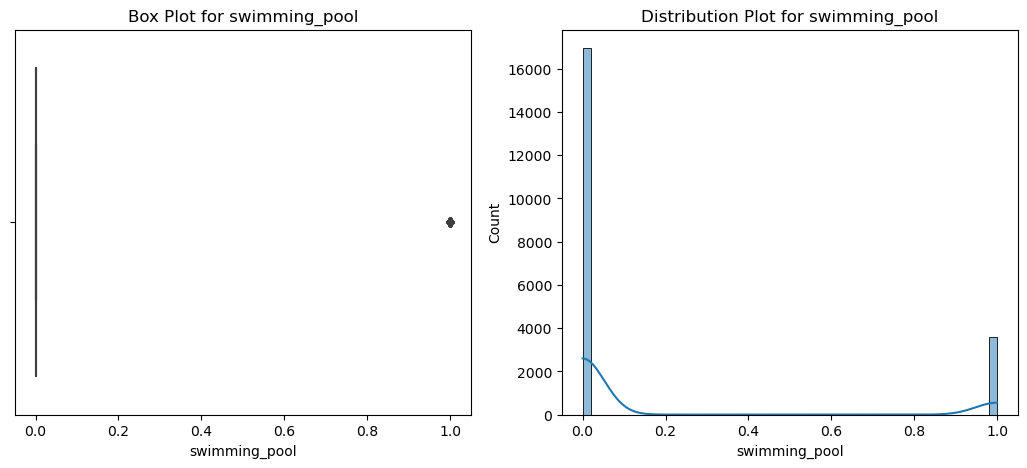

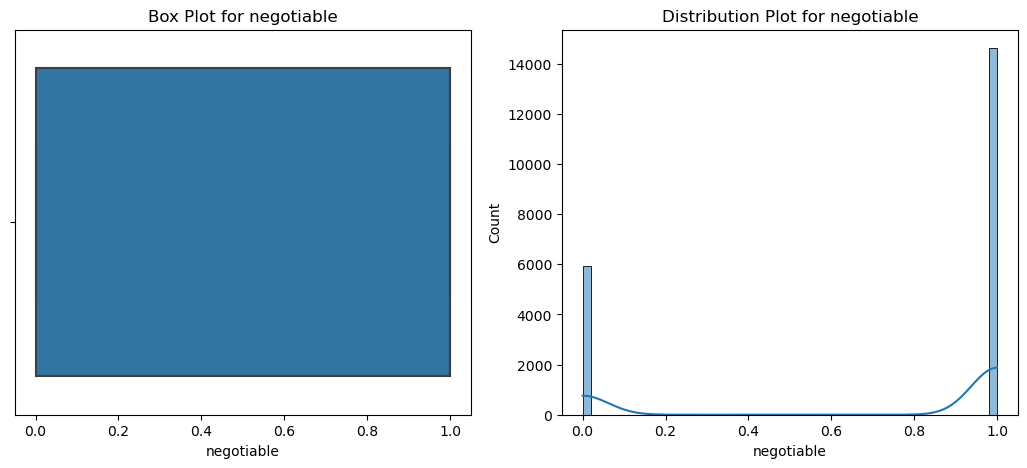

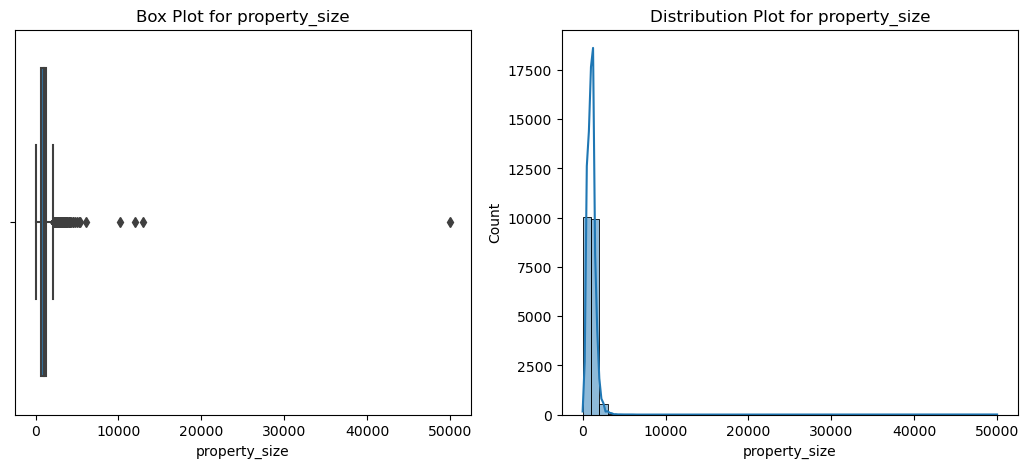

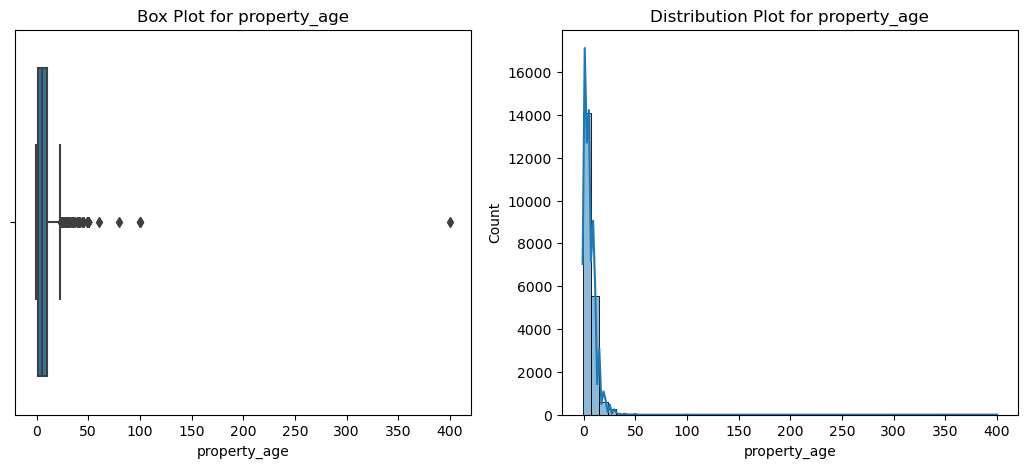

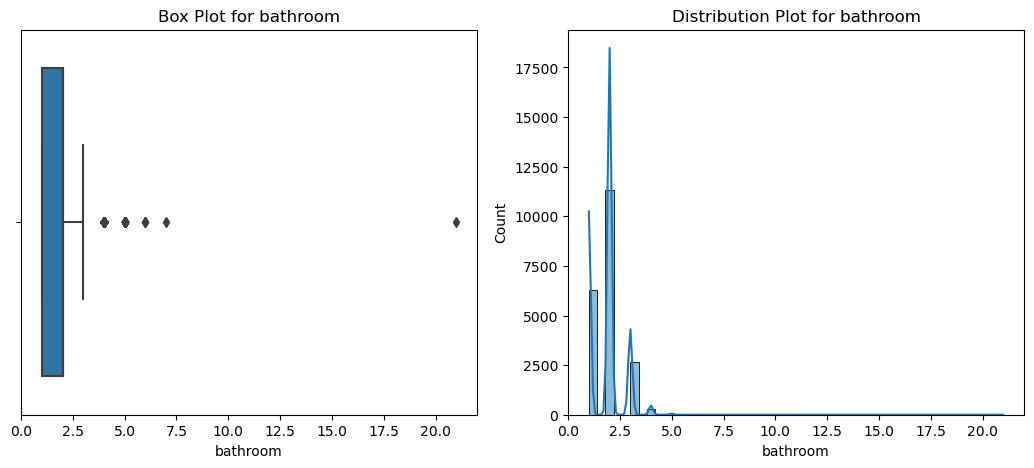

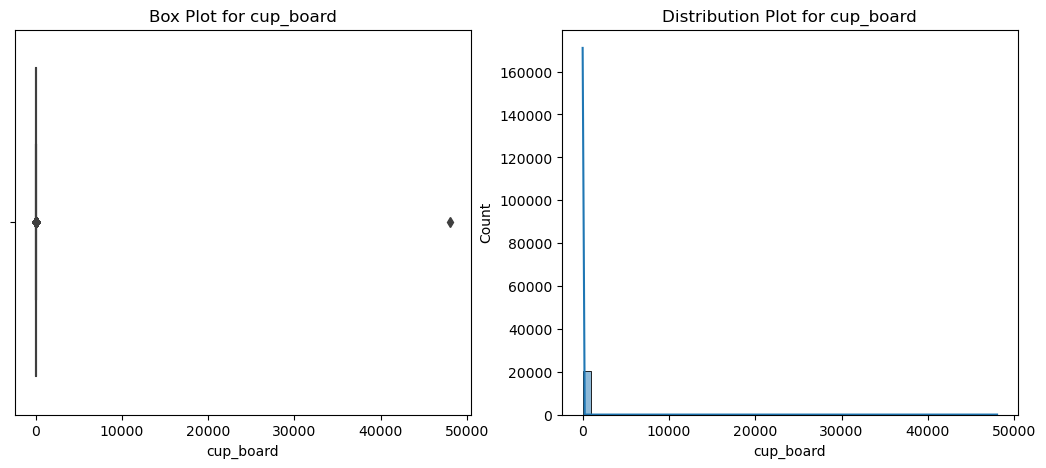

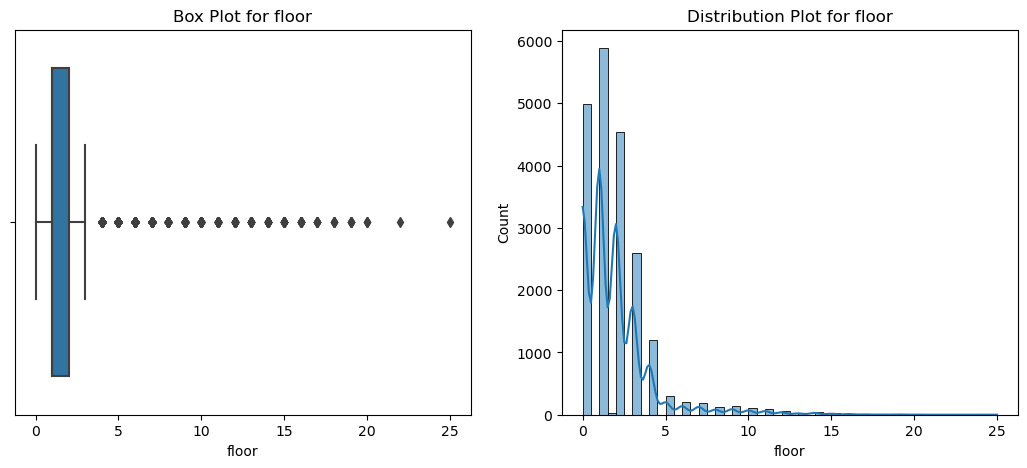

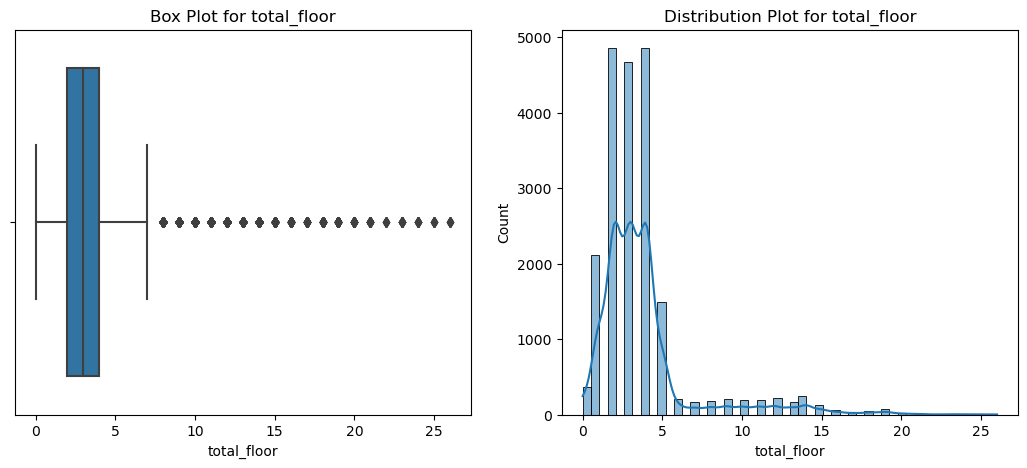

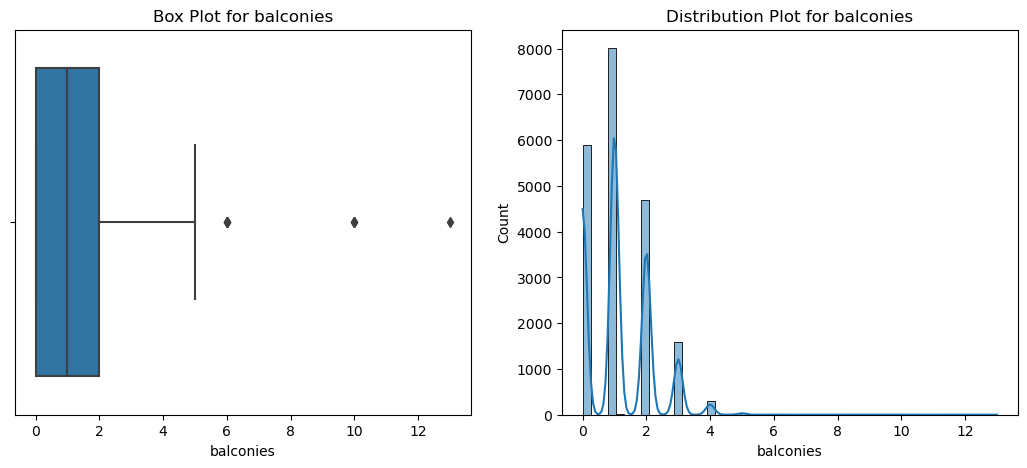

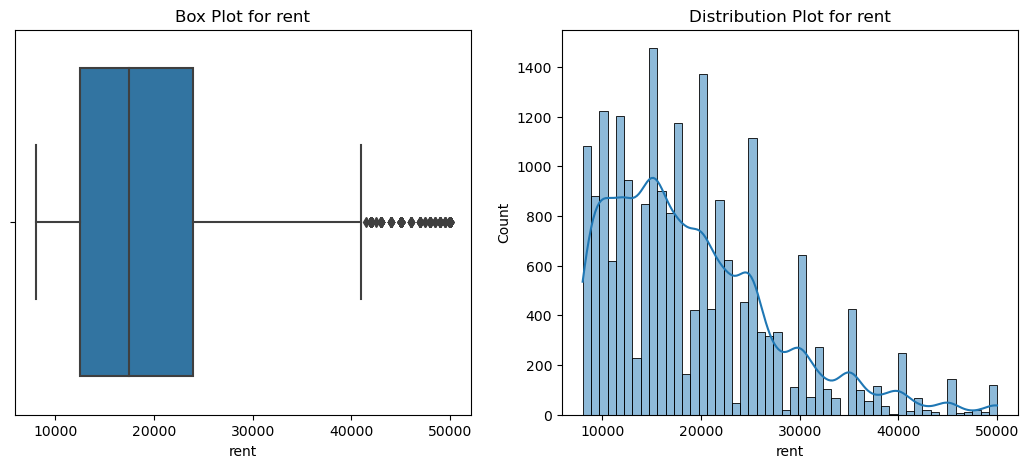

In [22]:
for i in ['latitude','longitude','gym','lift','swimming_pool','negotiable','property_size','property_age','bathroom','cup_board','floor','total_floor','balconies','rent']:

    plot(rent,i)

In [23]:
def outlier(rent, column):
    iqr = rent[column].quantile(0.75) - rent[column].quantile(0.25)
    upper_value = rent[column].quantile(0.75) + (1.5*iqr)
    lower_value = rent[column].quantile(0.25) - (1.5*iqr)
    rent[column] = rent[column].clip(lower_value, upper_value)

outlier(rent, 'latitude') 
outlier(rent, 'longitude')   
outlier(rent, 'property_size')    
outlier(rent, 'property_age')
outlier(rent, 'bathroom')
outlier(rent, 'balconies')
outlier(rent, 'rent')
rent

,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,...,floor,total_floor,amenities,water_supply,building_type,balconies,rent,activation_year,activation_month,activation_day
0,BHK2,Whitefield,2018-04-21 14:44:00,12.934471,77.634471,FAMILY,1,1,1,0,...,6.00000,12.000000,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.000000,40000.000000,2018,4,21
1,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,1,...,3.00000,4.000000,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.000000,22000.000000,2017,9,10
2,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,77.881030,FAMILY,0,1,0,0,...,1.00000,5.000000,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.000000,28000.000000,2018,12,6
3,BHK1,Attiguppe,2018-07-20 16:22:00,12.955991,77.531634,FAMILY,0,0,0,1,...,1.00000,2.000000,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.000000,8000.000000,2018,7,20
4,BHK3,Kodihalli,2018-05-31 17:41:00,12.963903,77.649446,FAMILY,0,0,0,1,...,0.00000,0.000000,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.000000,41250.000000,2018,5,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20550,BHK2,Whitefield,2017-04-11 18:11:00,12.945748,77.637295,FAMILY,1,1,1,1,...,1.87405,3.801335,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,1.149523,19056.733148,2017,4,11
20551,BHK2,Whitefield,2017-04-11 18:11:00,12.945748,77.637295,FAMILY,0,0,0,1,...,1.87405,3.801335,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,1.149523,19056.733148,2017,4,11
20552,BHK2,Whitefield,2017-04-11 18:11:00,12.945748,77.637295,FAMILY,1,1,0,1,...,1.87405,3.801335,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,1.149523,19056.733148,2017,4,11
20553,BHK2,Whitefield,2017-04-11 18:11:00,12.945748,77.637295,FAMILY,0,1,0,0,...,1.87405,3.801335,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,1.149523,19056.733148,2017,4,11


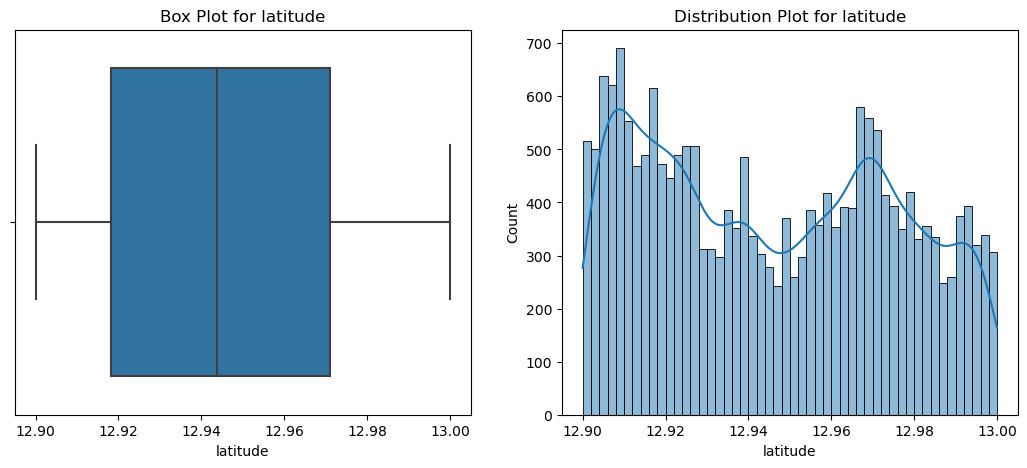

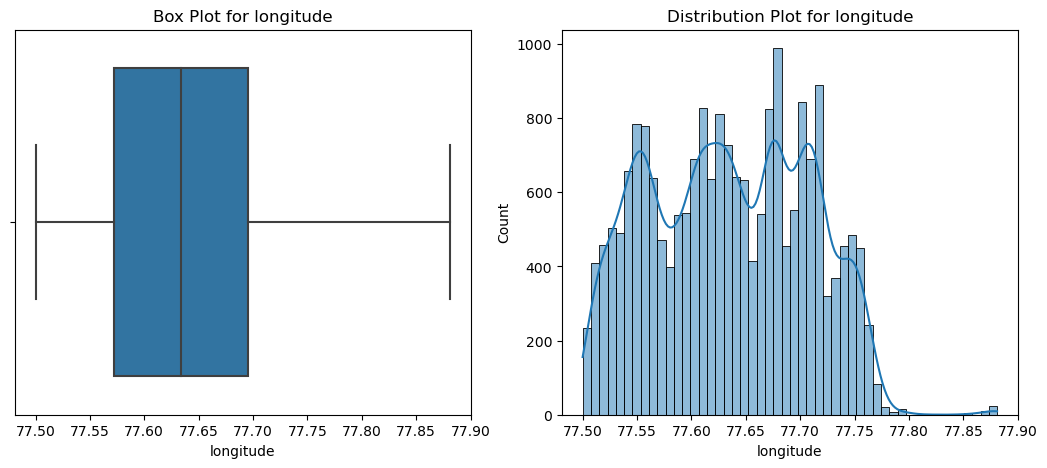

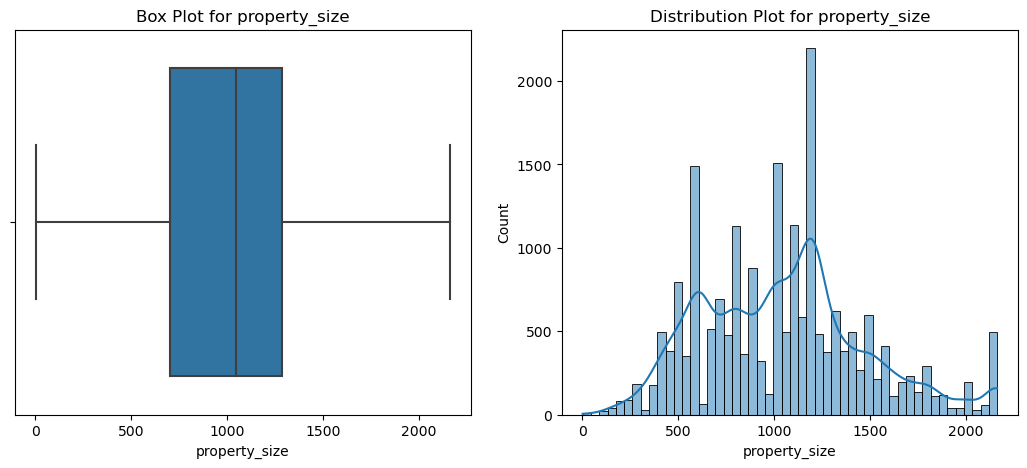

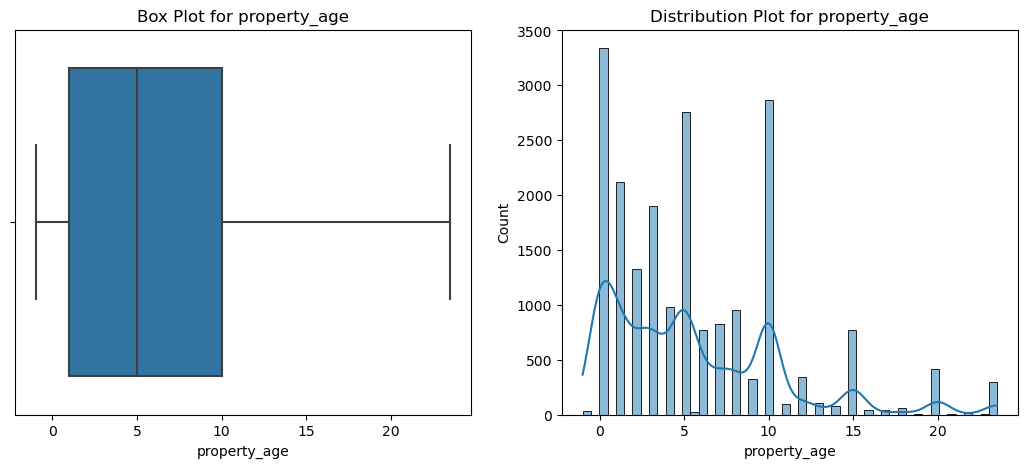

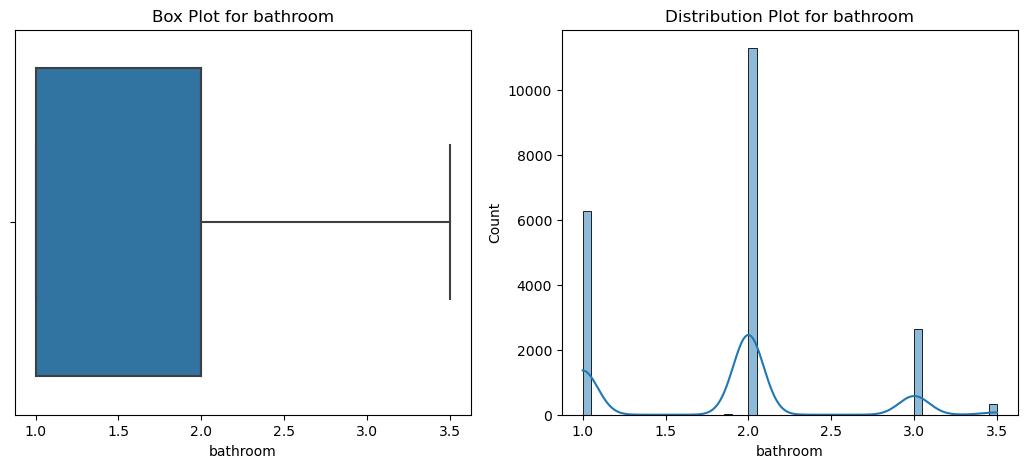

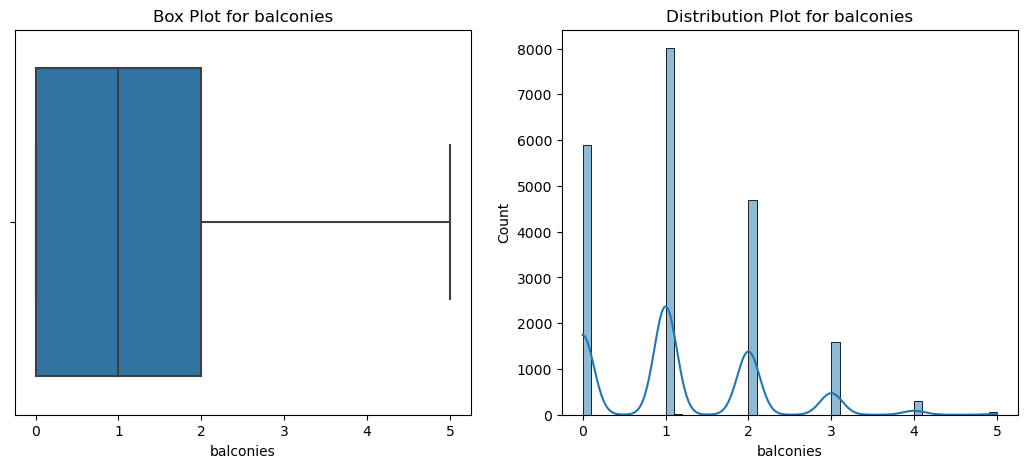

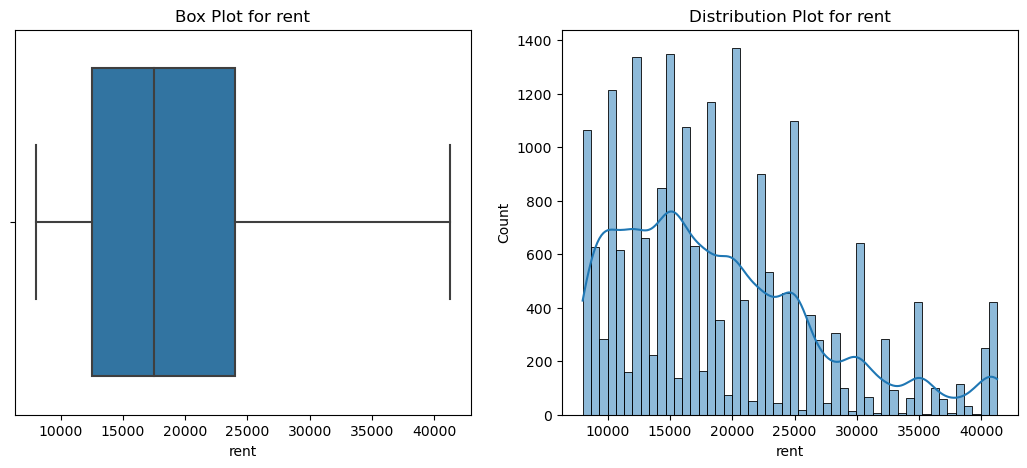

In [24]:
for i in['latitude','longitude','property_size','property_age','bathroom','balconies','rent']:
    plot(rent,i)

In [25]:
from scipy.stats import chi2_contingency
chi2_test = []
categorical_features= ['type','locality','lease_type','furnishing','parking','facing','water_supply','building_type']

for feature in categorical_features:
    if chi2_contingency(pd.crosstab(rent['rent'], rent[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
test_result = pd.DataFrame(data=[categorical_features, chi2_test]).T
test_result.columns = ['Categorical Features', 'Hypothesis Result']

test_result

,Categorical Features,Hypothesis Result
0,type,Reject Null Hypothesis
1,locality,Reject Null Hypothesis
2,lease_type,Reject Null Hypothesis
3,furnishing,Reject Null Hypothesis
4,parking,Reject Null Hypothesis
5,facing,Reject Null Hypothesis
6,water_supply,Reject Null Hypothesis
7,building_type,Reject Null Hypothesis


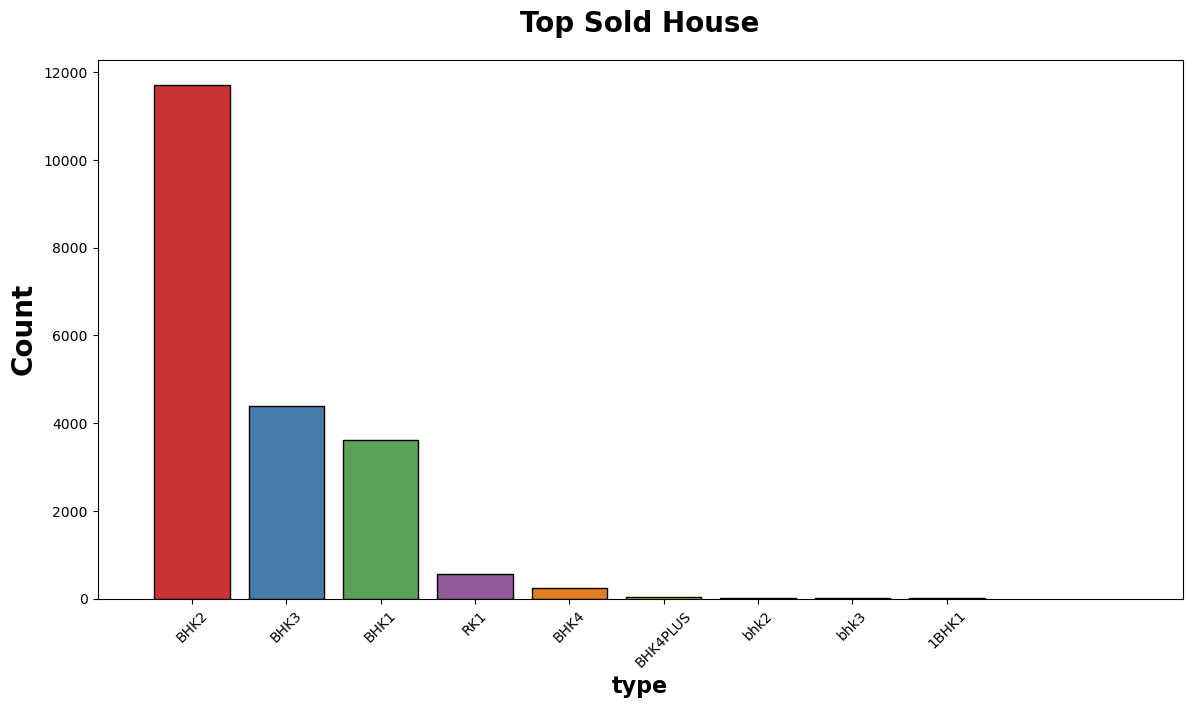

In [26]:
plt.subplots(figsize=(14,7))
sns.countplot(x="type", data=rent,ec = "black",palette="Set1",order = rent['type'].value_counts().index)
plt.title("Top Sold House", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("type", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

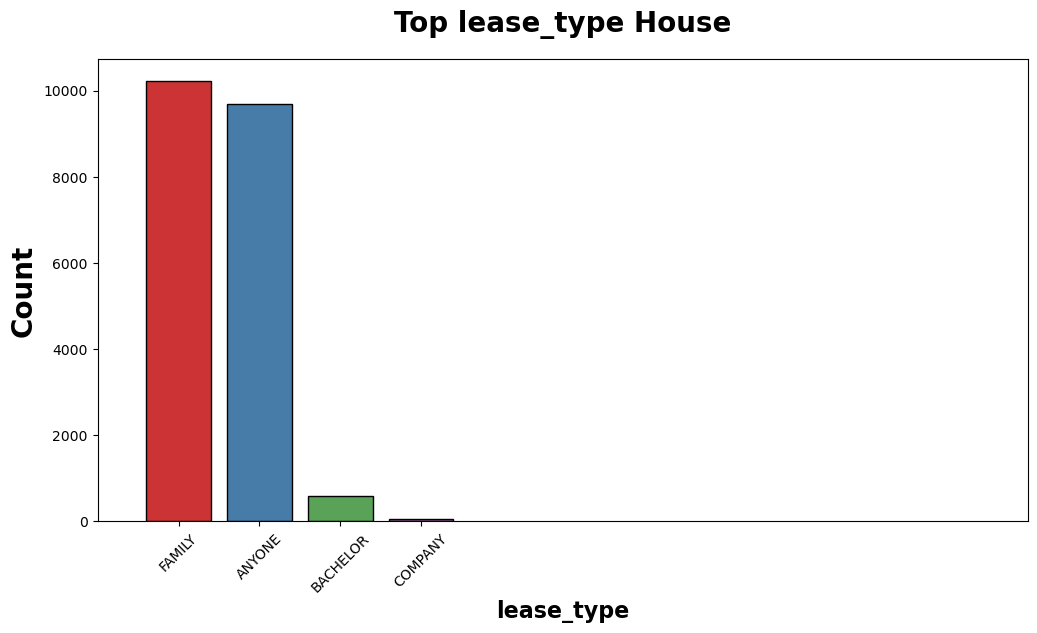

In [27]:
plt.subplots(figsize=(12,6))
sns.countplot(x="lease_type", data=rent,ec = "black",palette="Set1",order = rent['lease_type'].value_counts().index)
plt.title("Top lease_type House", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("lease_type", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

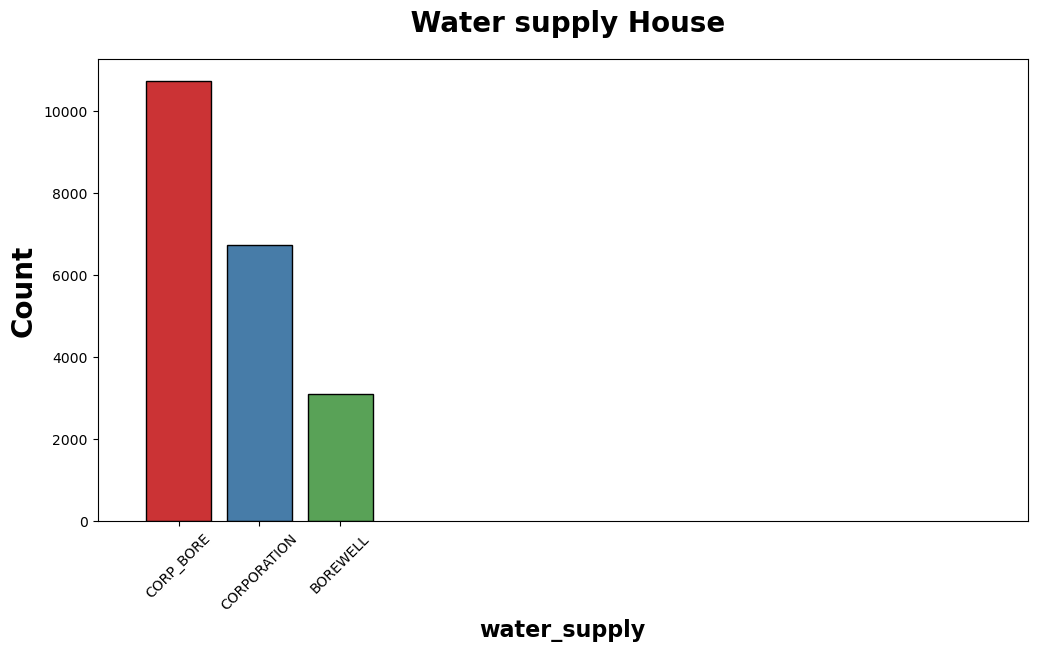

In [28]:
plt.subplots(figsize=(12,6))
sns.countplot(x="water_supply", data=rent,ec = "black",palette="Set1",order = rent['water_supply'].value_counts().index)
plt.title(" Water supply House", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("water_supply", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

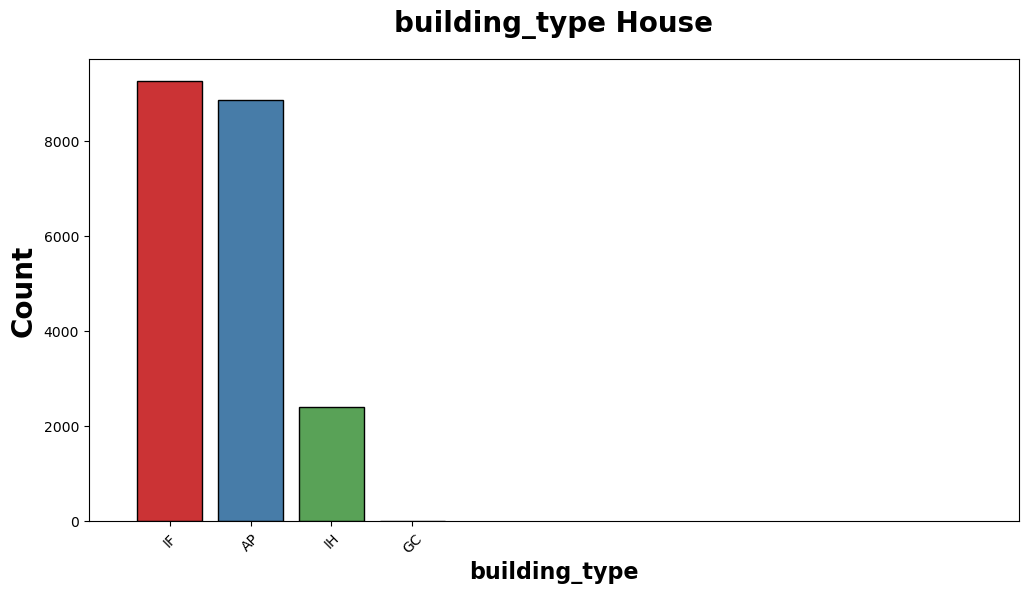

In [29]:
plt.subplots(figsize=(12,6))
sns.countplot(x="building_type", data=rent,ec = "black",palette="Set1",order = rent['building_type'].value_counts().index)
plt.title("building_type House", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("building_type", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

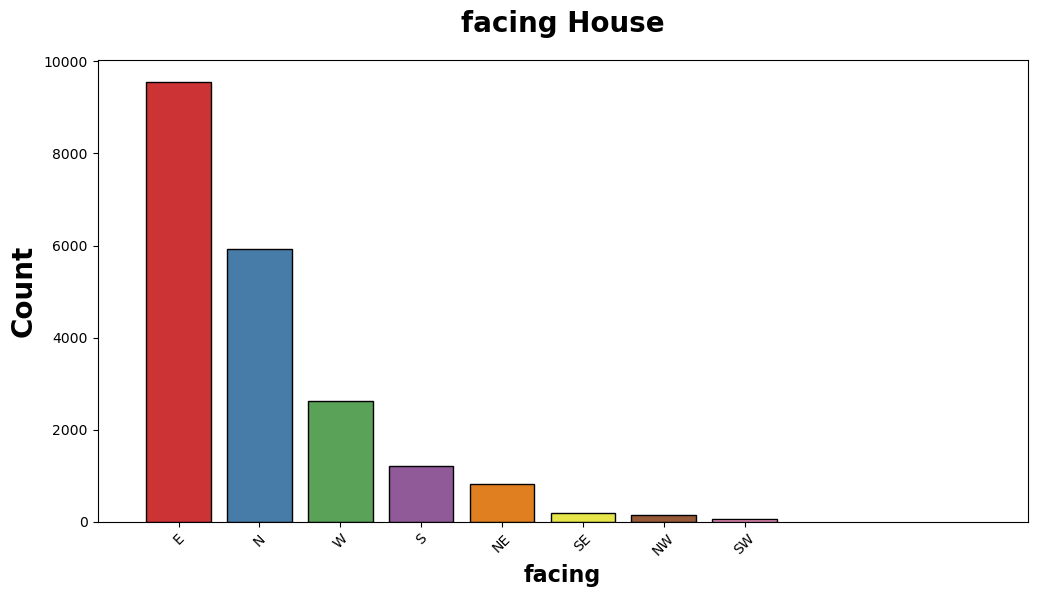

In [30]:

plt.subplots(figsize=(12,6))
sns.countplot(x="facing", data=rent,ec = "black",palette="Set1",order = rent['facing'].value_counts().index)
plt.title("facing House", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("facing", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

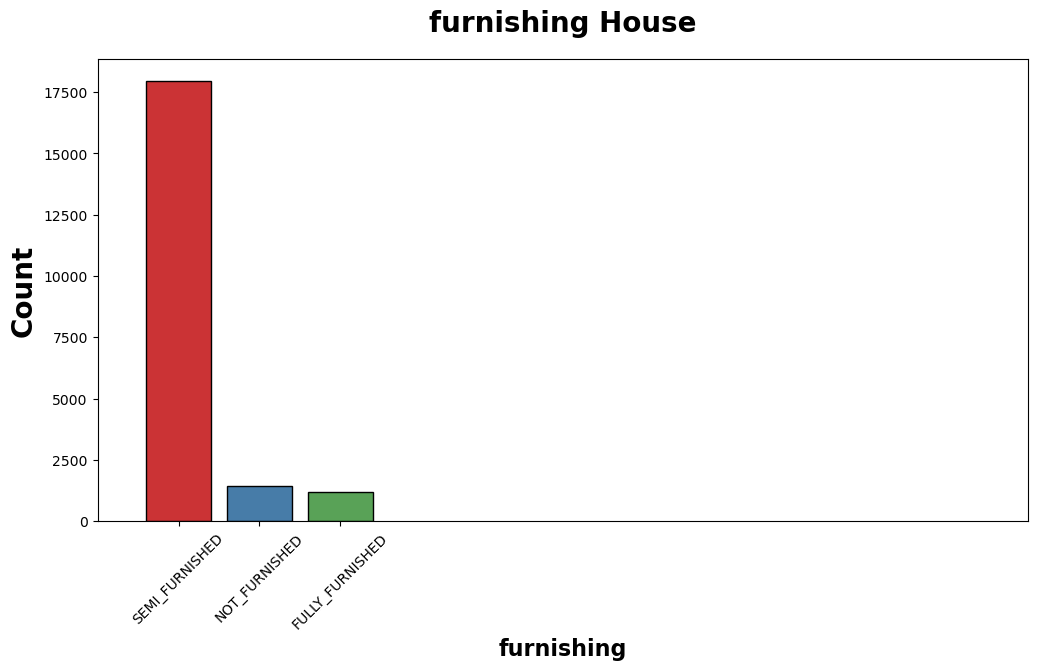

In [31]:
plt.subplots(figsize=(12,6))
sns.countplot(x="furnishing", data=rent,ec = "black",palette="Set1",order = rent['furnishing'].value_counts().index)
plt.title("furnishing House", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("furnishing", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

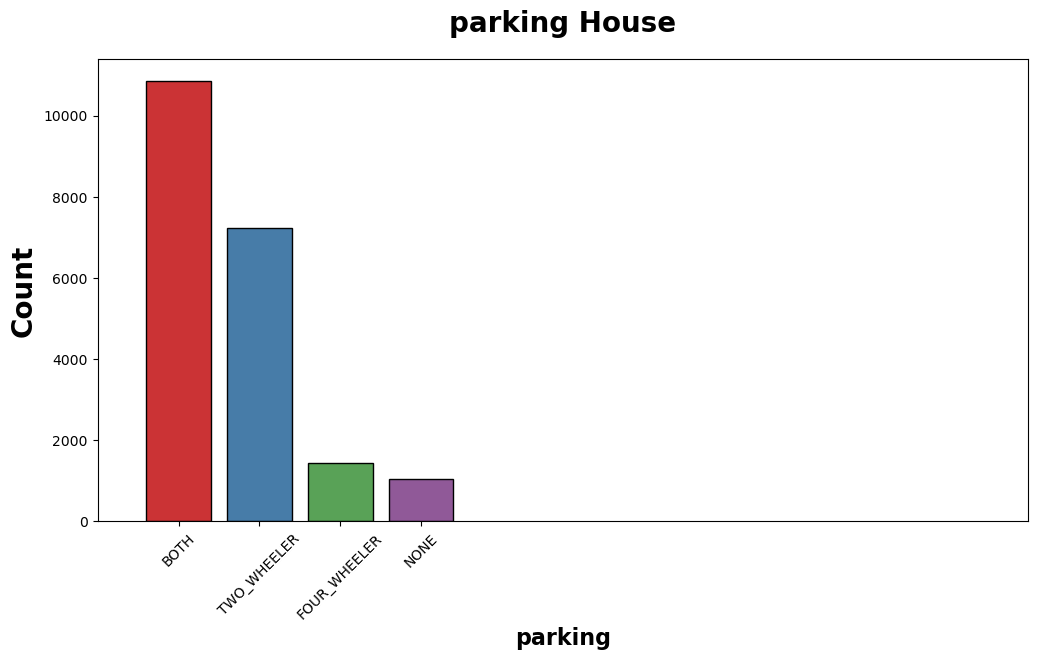

In [32]:
plt.subplots(figsize=(12,6))
sns.countplot(x="parking", data=rent,ec = "black",palette="Set1",order = rent['parking'].value_counts().index)
plt.title("parking House", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("parking", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

# 2.Bivariate Analysis:

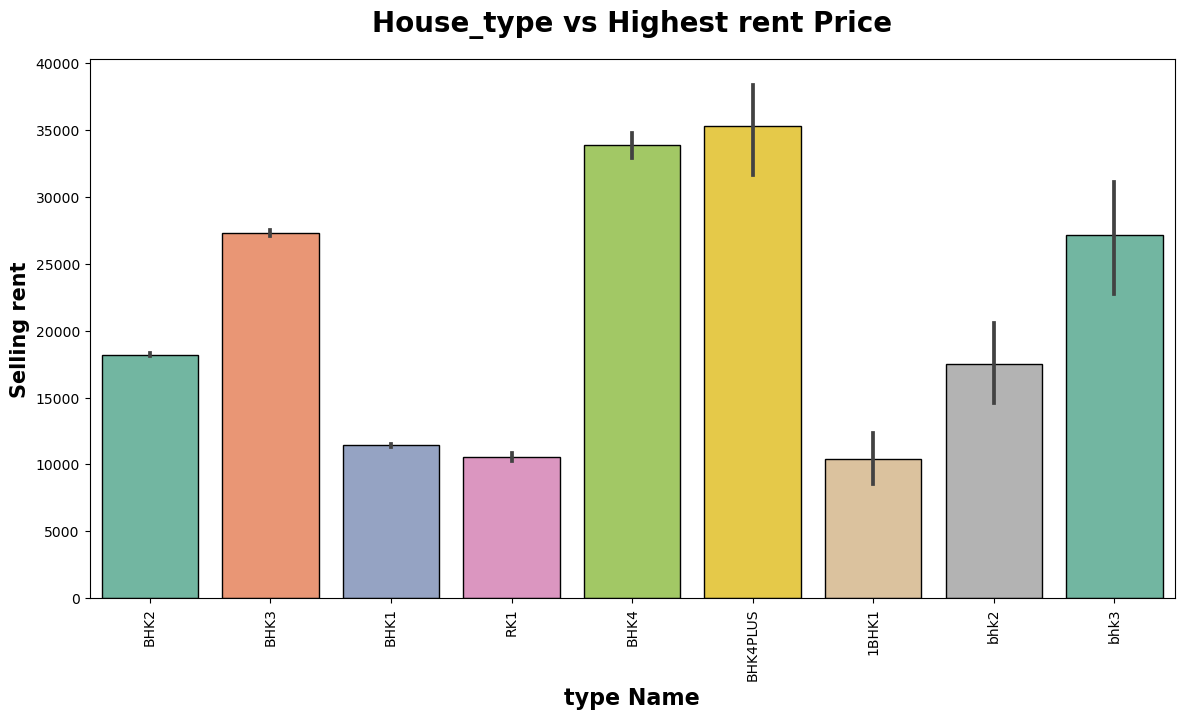

In [33]:
plt.subplots(figsize=(14,7))
sns.barplot(x='type', y='rent',data = rent ,ec = "black",palette="Set2")
plt.title("House_type vs Highest rent Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling rent", weight="bold", fontsize=15)
plt.xlabel("type Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()


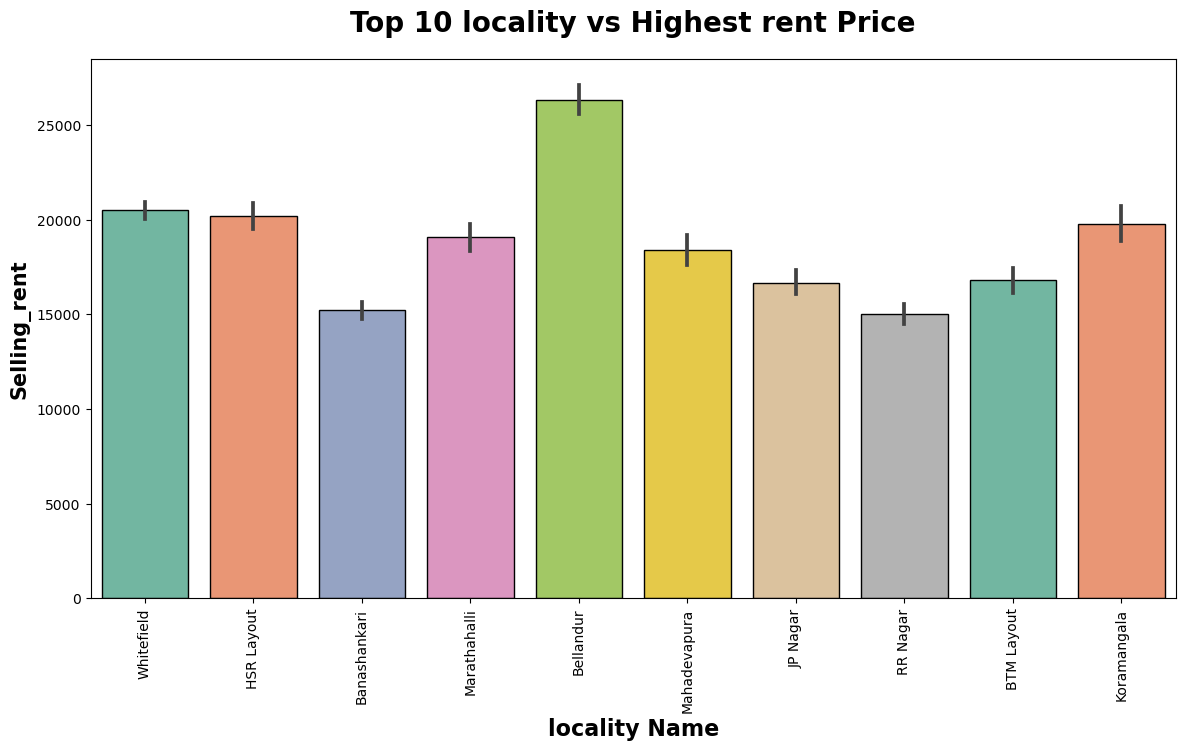

In [34]:
plt.subplots(figsize=(14,7))
sns.barplot(x='locality', y='rent',data = rent ,ec = "black",palette="Set2",order = rent['locality'].value_counts().index[:10])
plt.title("Top 10 locality vs Highest rent Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling_rent", weight="bold", fontsize=15)
plt.xlabel("locality Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()


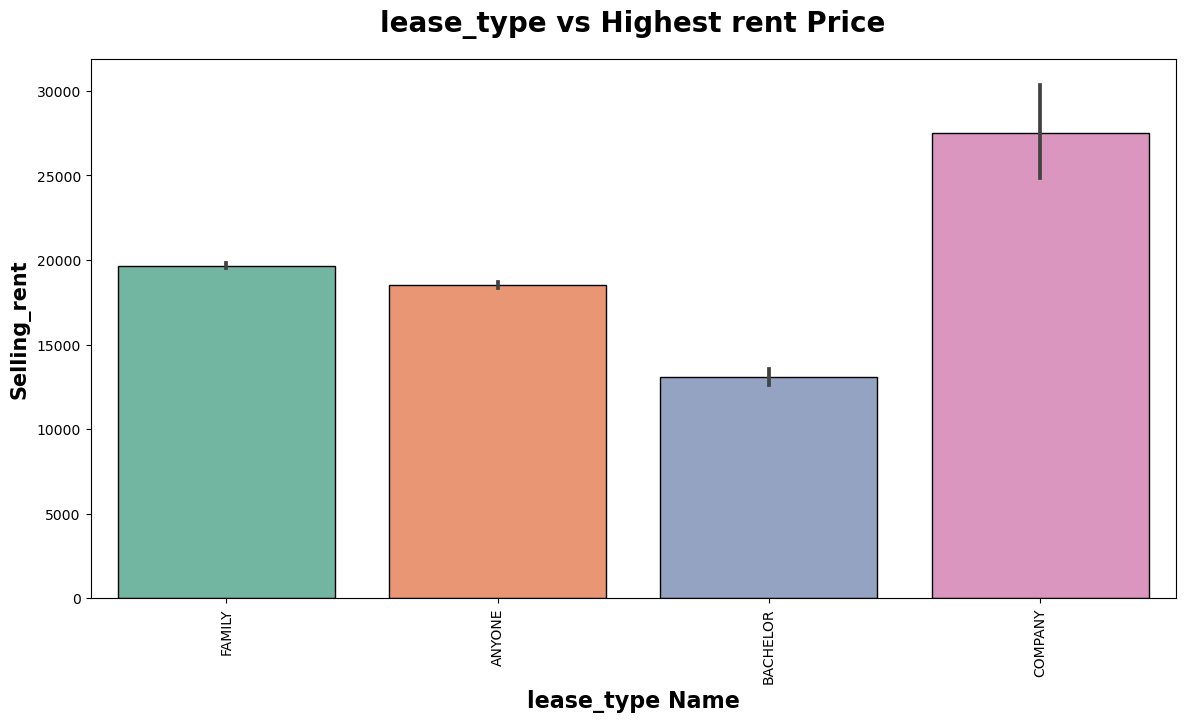

In [35]:
plt.subplots(figsize=(14,7))
sns.barplot(x='lease_type', y='rent',data = rent ,ec = "black",palette="Set2")
plt.title("lease_type vs Highest rent Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling_rent", weight="bold", fontsize=15)
plt.xlabel("lease_type Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()


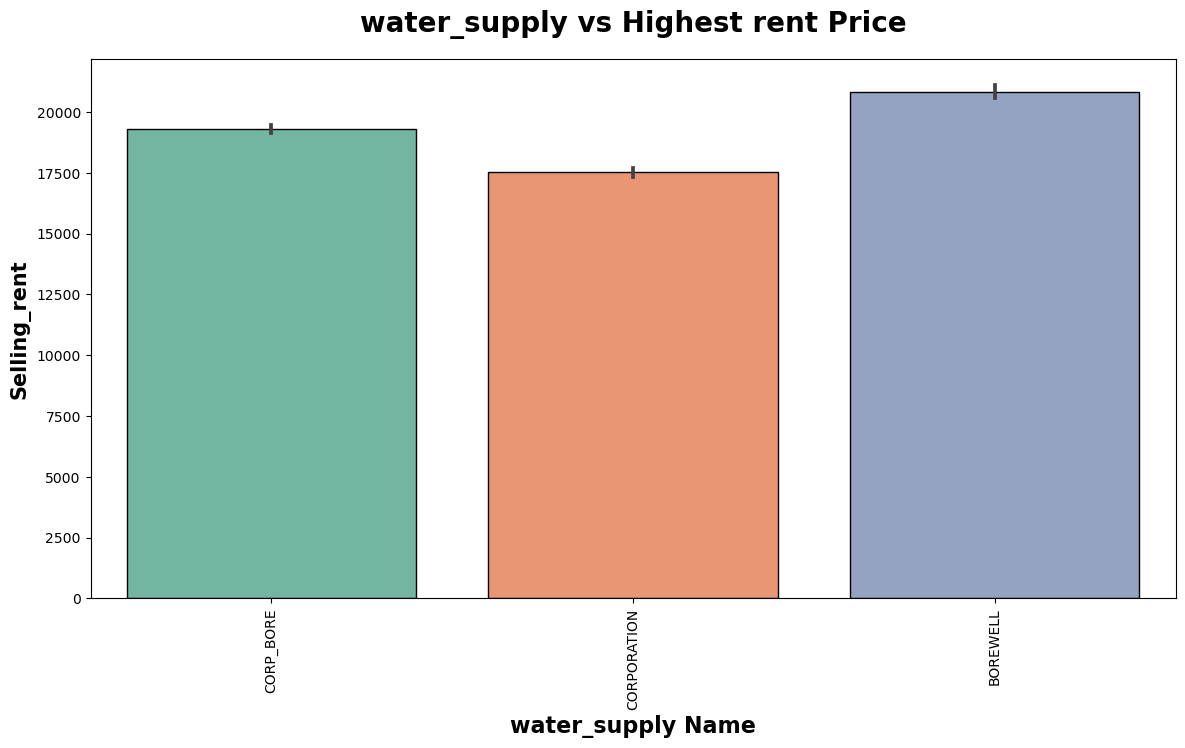

In [36]:
plt.subplots(figsize=(14,7))
sns.barplot(x='water_supply', y='rent',data = rent ,ec = "black",palette="Set2")
plt.title("water_supply vs Highest rent Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling_rent", weight="bold", fontsize=15)
plt.xlabel("water_supply Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()


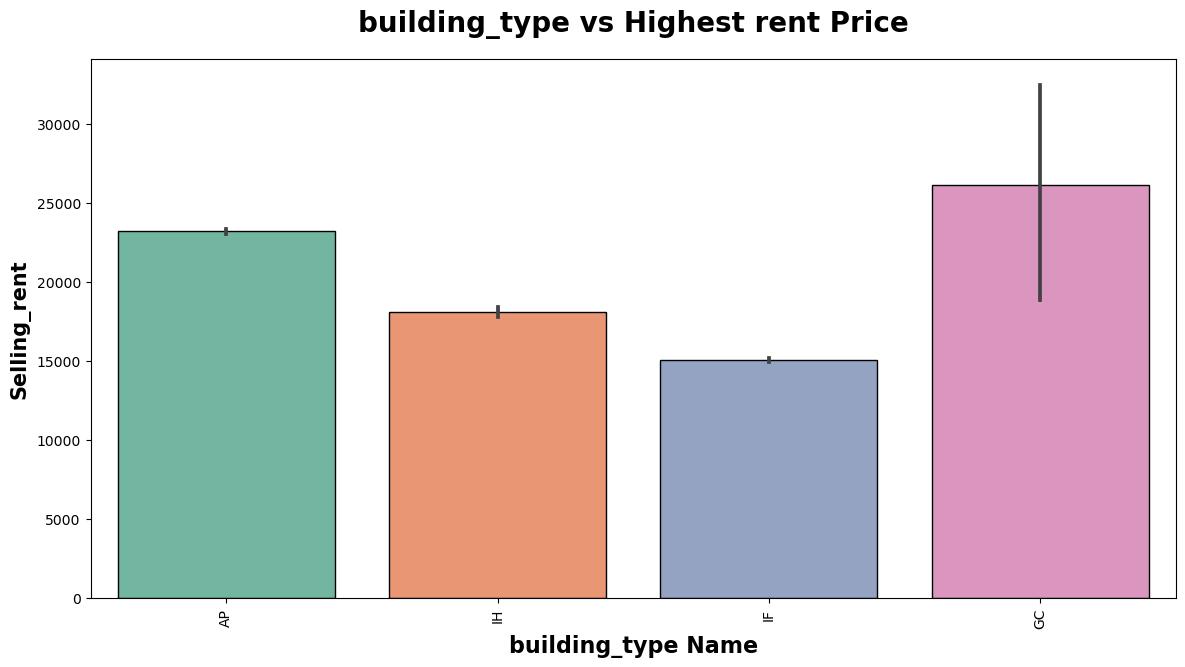

In [37]:
plt.subplots(figsize=(14,7))
sns.barplot(x='building_type', y='rent',data = rent ,ec = "black",palette="Set2")
plt.title("building_type vs Highest rent Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling_rent", weight="bold", fontsize=15)
plt.xlabel("building_type Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()


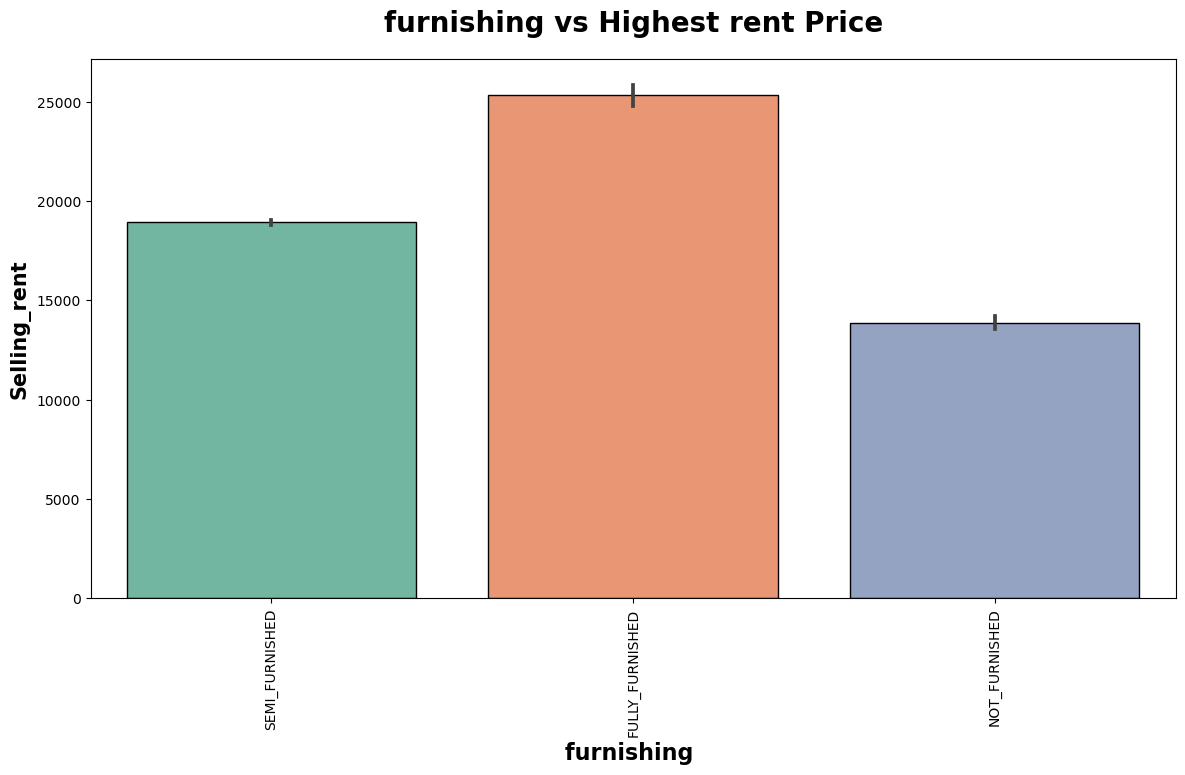

In [38]:
plt.subplots(figsize=(14,7))
sns.barplot(x='furnishing', y='rent',data = rent ,ec = "black",palette="Set2")
plt.title("furnishing vs Highest rent Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling_rent", weight="bold", fontsize=15)
plt.xlabel("furnishing ", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()


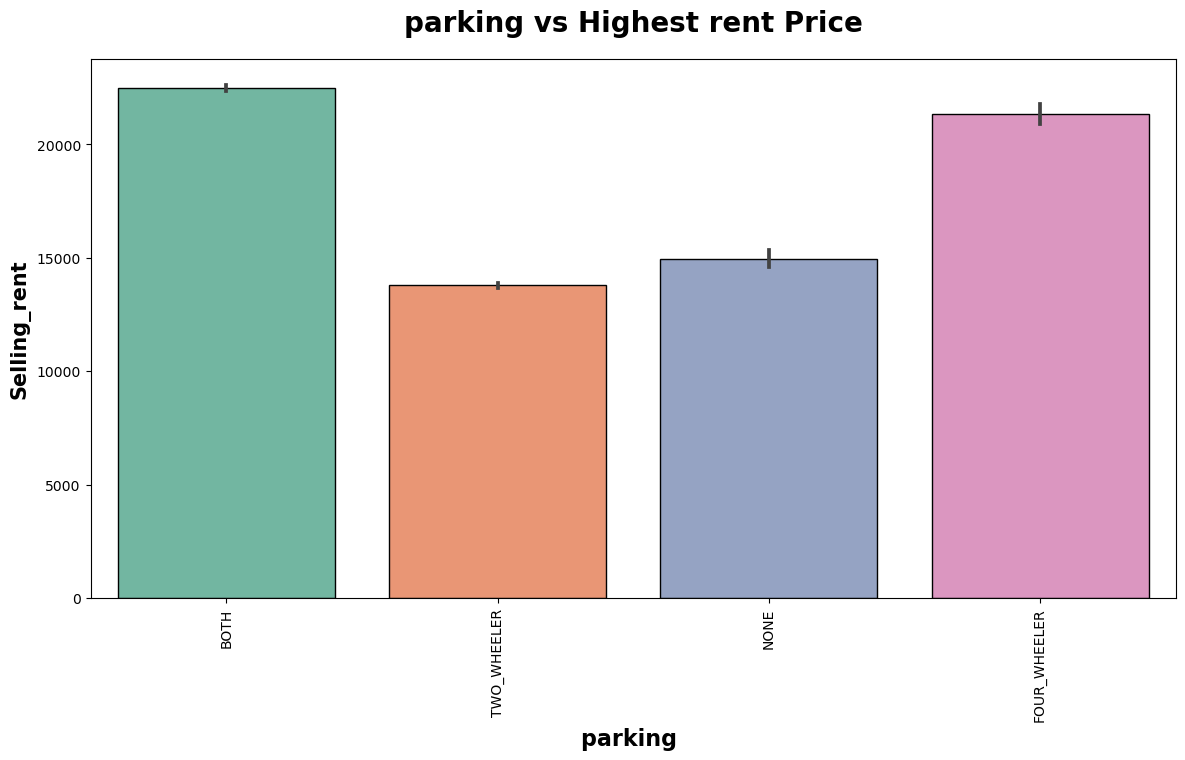

In [39]:
plt.subplots(figsize=(14,7))
sns.barplot(x='parking', y='rent',data = rent ,ec = "black",palette="Set2")
plt.title("parking vs Highest rent Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling_rent", weight="bold", fontsize=15)
plt.xlabel("parking ", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()


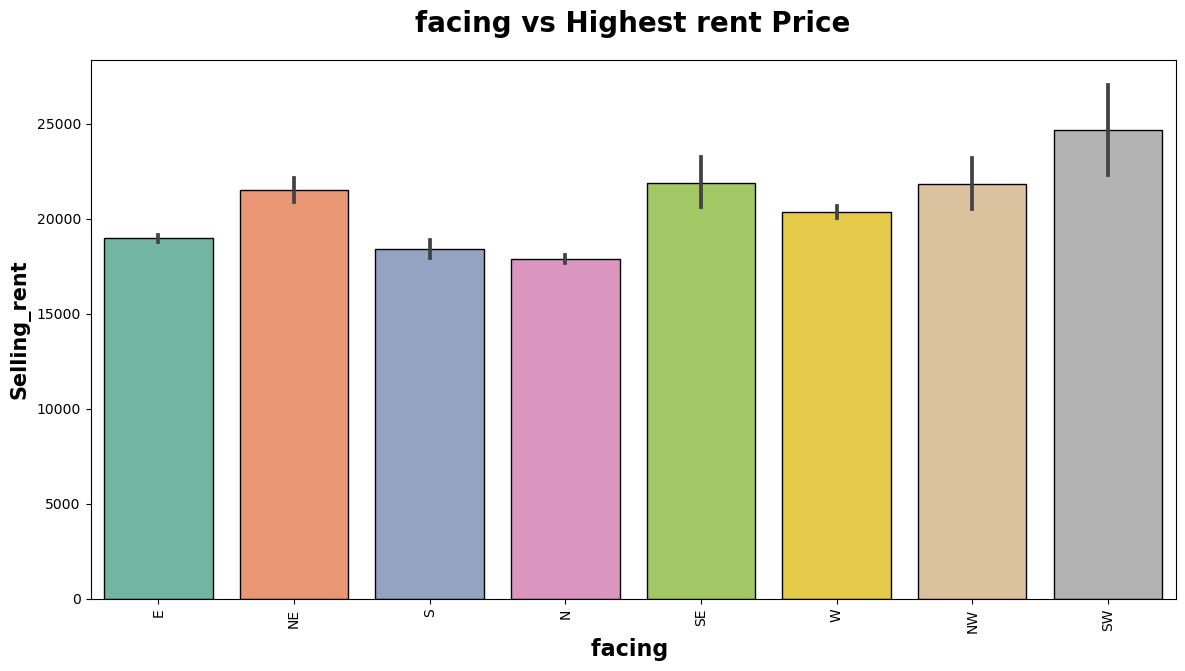

In [40]:
plt.subplots(figsize=(14,7))
sns.barplot(x='facing', y='rent',data = rent ,ec = "black",palette="Set2")
plt.title("facing vs Highest rent Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling_rent", weight="bold", fontsize=15)
plt.xlabel("facing ", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

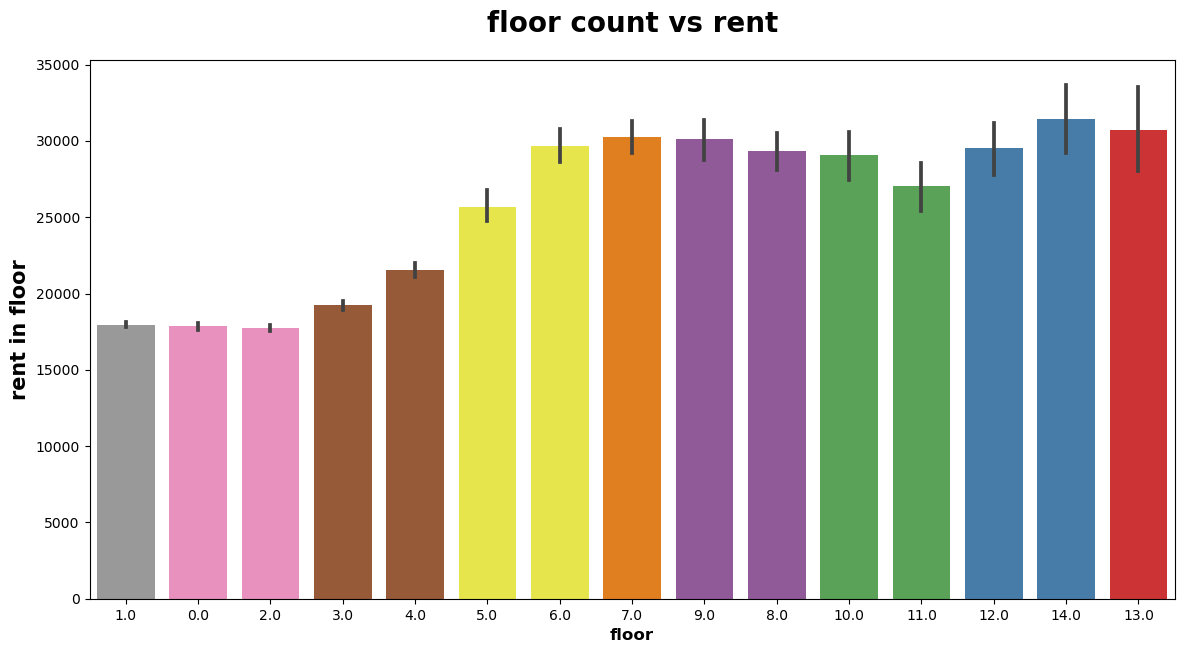

In [41]:
plt.subplots(figsize=(14,7))
sns.barplot(x='floor', y='rent', data=rent,palette="Set1_r",order =rent['floor'].value_counts().index[:15])
plt.title("floor count vs rent", weight="bold",fontsize=20, pad=20)
plt.ylabel("rent in floor", weight="bold", fontsize=15)
plt.xlabel("floor", weight="bold", fontsize=12)
plt.show()

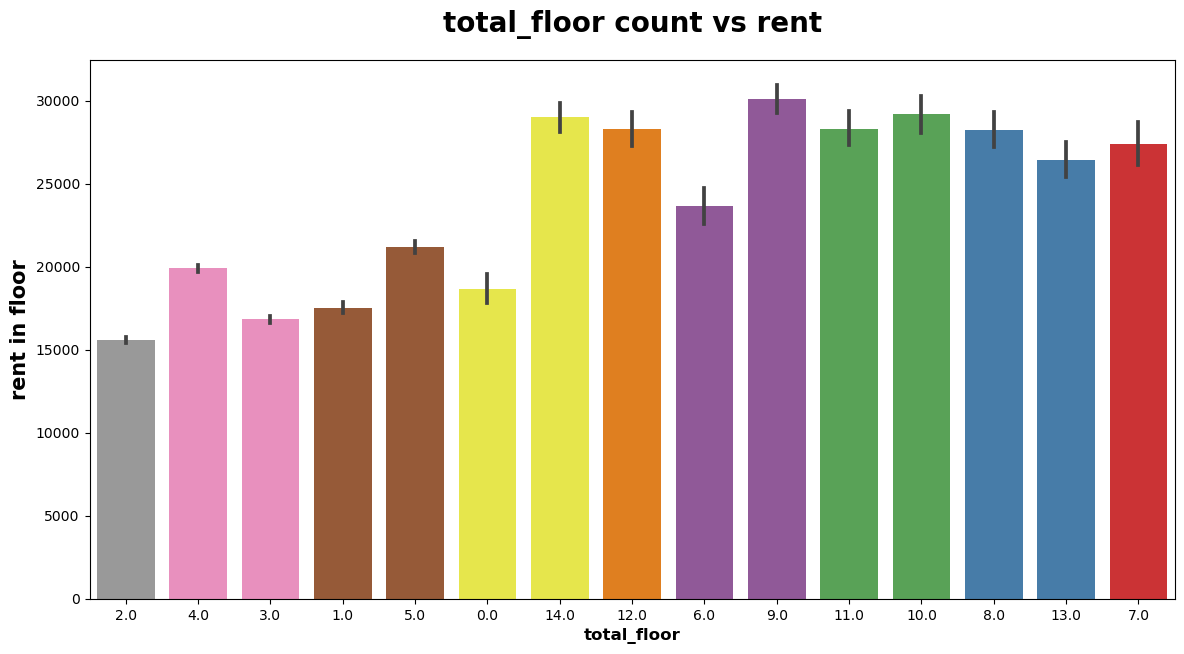

In [42]:
plt.subplots(figsize=(14,7))
sns.barplot(x='total_floor', y='rent', data=rent,palette="Set1_r",order =rent['total_floor'].value_counts().index[:15])
plt.title("total_floor count vs rent", weight="bold",fontsize=20, pad=20)
plt.ylabel("rent in floor", weight="bold", fontsize=15)
plt.xlabel("total_floor", weight="bold", fontsize=12)
plt.show()

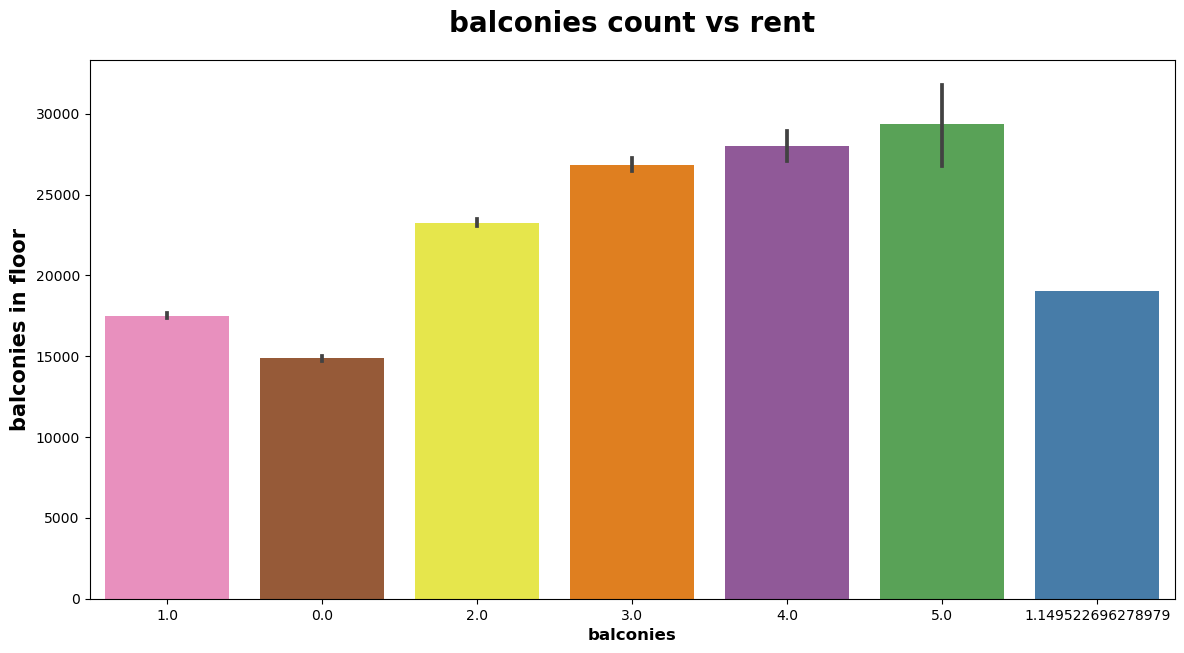

In [43]:
plt.subplots(figsize=(14,7))
sns.barplot(x='balconies', y='rent', data=rent,palette="Set1_r",order =rent['balconies'].value_counts().index[:15])
plt.title("balconies count vs rent", weight="bold",fontsize=20, pad=20)
plt.ylabel("balconies in floor", weight="bold", fontsize=15)
plt.xlabel("balconies", weight="bold", fontsize=12)
plt.show()

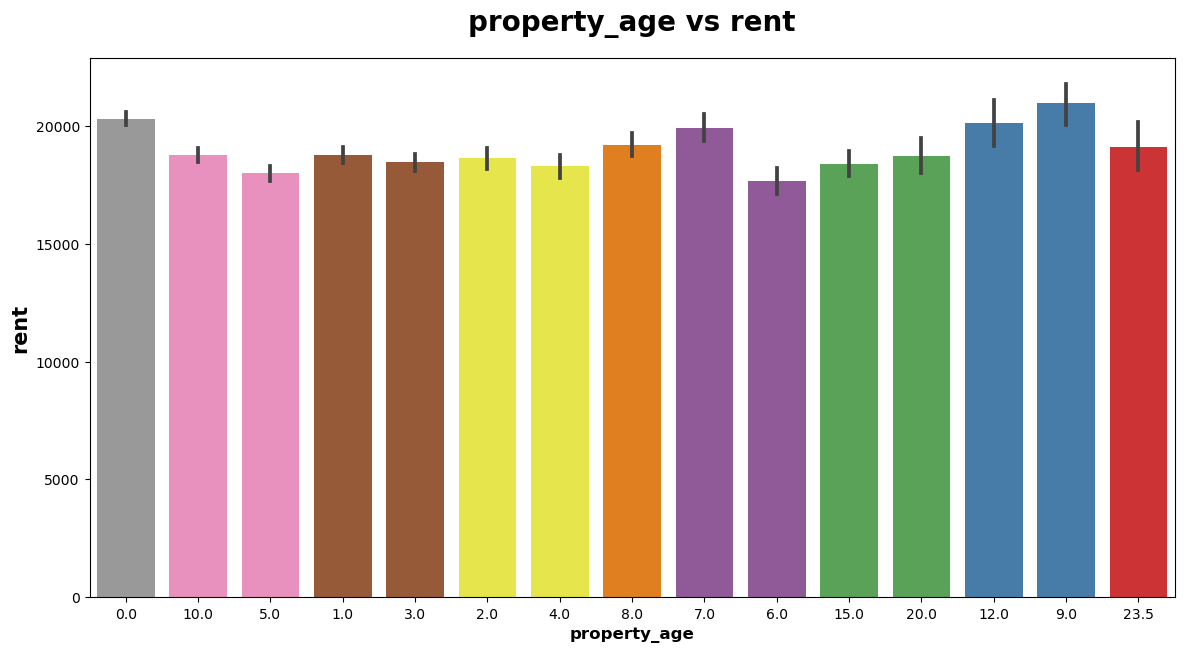

In [44]:
plt.subplots(figsize=(14,7))
sns.barplot(x='property_age', y='rent', data=rent,palette="Set1_r",order =rent['property_age'].value_counts().index[:15])
plt.title("property_age vs rent", weight="bold",fontsize=20, pad=20)
plt.ylabel("rent", weight="bold", fontsize=15)
plt.xlabel("property_age", weight="bold", fontsize=12)
plt.show()

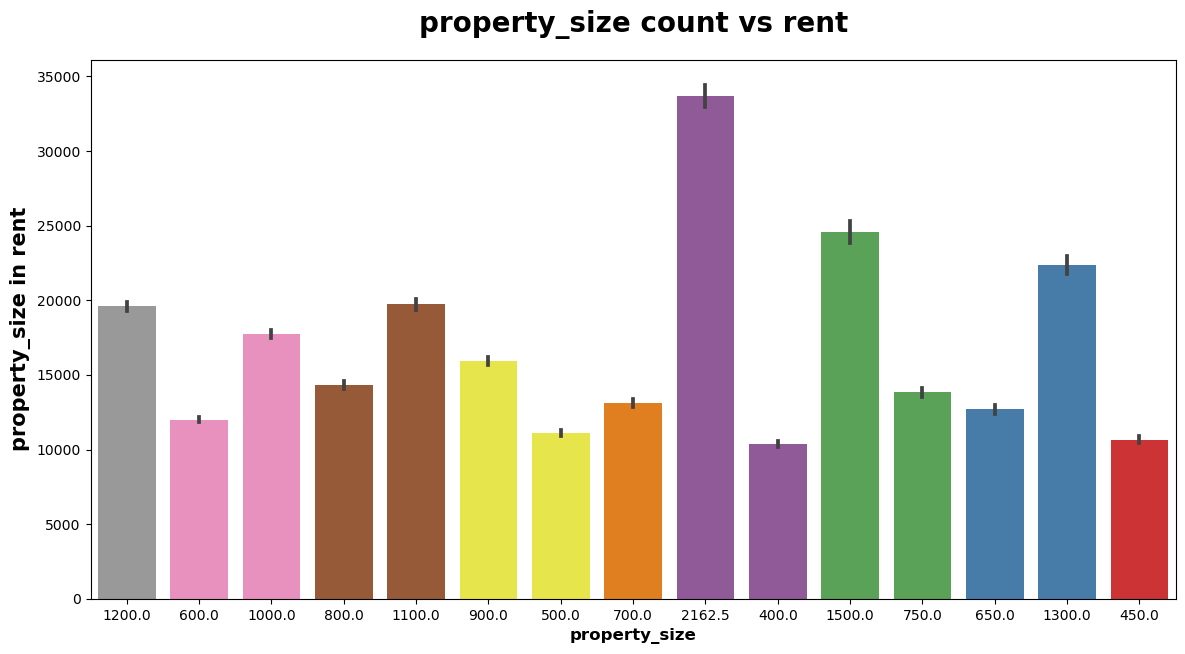

In [45]:
plt.subplots(figsize=(14,7))
sns.barplot(x='property_size', y='rent', data=rent,palette="Set1_r",order =rent['property_size'].value_counts().index[:15])
plt.title("property_size count vs rent", weight="bold",fontsize=20, pad=20)
plt.ylabel("property_size in rent", weight="bold", fontsize=15)
plt.xlabel("property_size", weight="bold", fontsize=12)
plt.show()

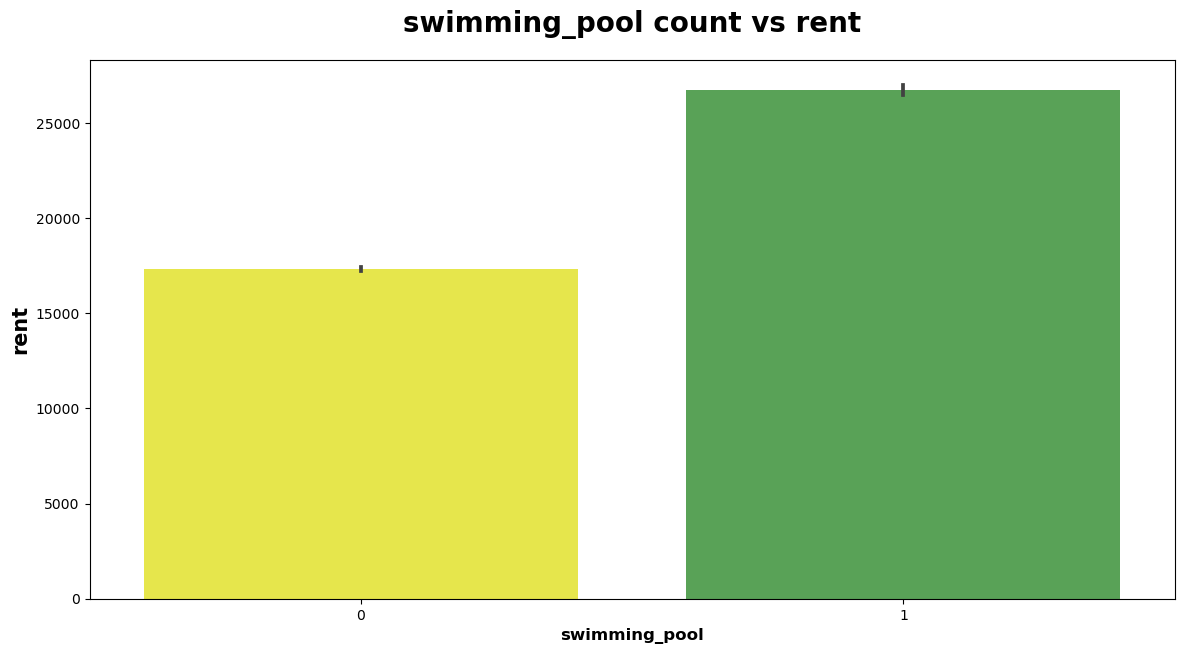

In [46]:
plt.subplots(figsize=(14,7))
sns.barplot(x='swimming_pool', y='rent', data=rent,palette="Set1_r")
plt.title("swimming_pool count vs rent", weight="bold",fontsize=20, pad=20)
plt.ylabel("rent", weight="bold", fontsize=15)
plt.xlabel("swimming_pool", weight="bold", fontsize=12)
plt.show()

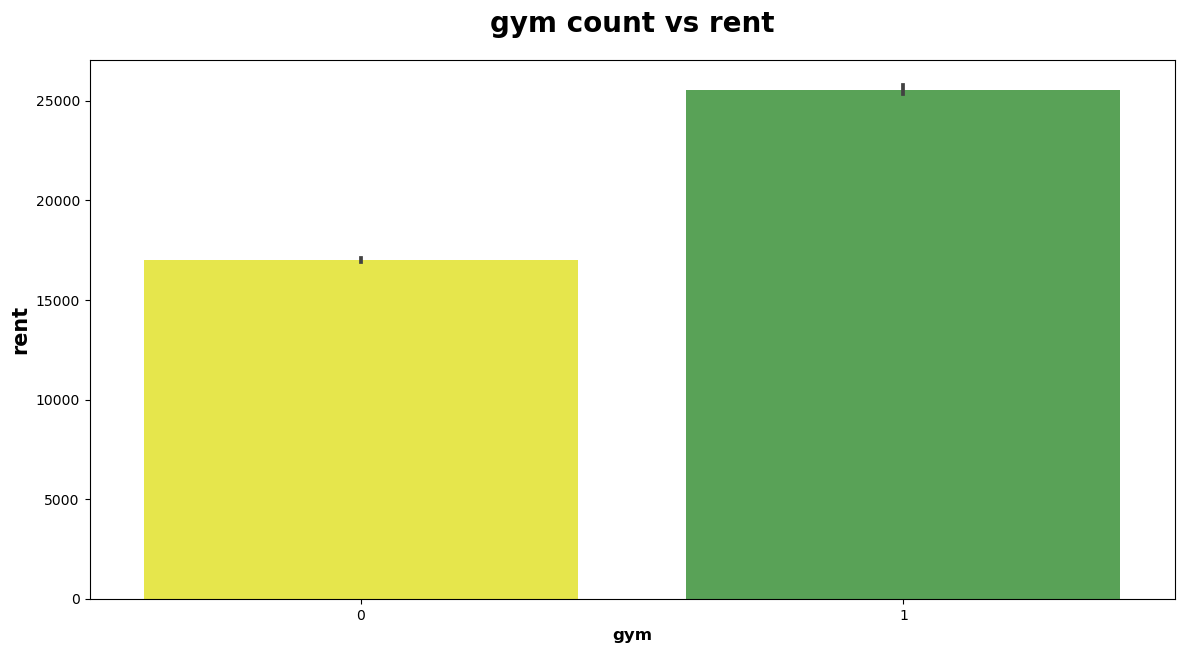

In [47]:
plt.subplots(figsize=(14,7))
sns.barplot(x='gym', y='rent', data=rent,palette="Set1_r")
plt.title("gym count vs rent", weight="bold",fontsize=20, pad=20)
plt.ylabel("rent", weight="bold", fontsize=15)
plt.xlabel("gym", weight="bold", fontsize=12)
plt.show()

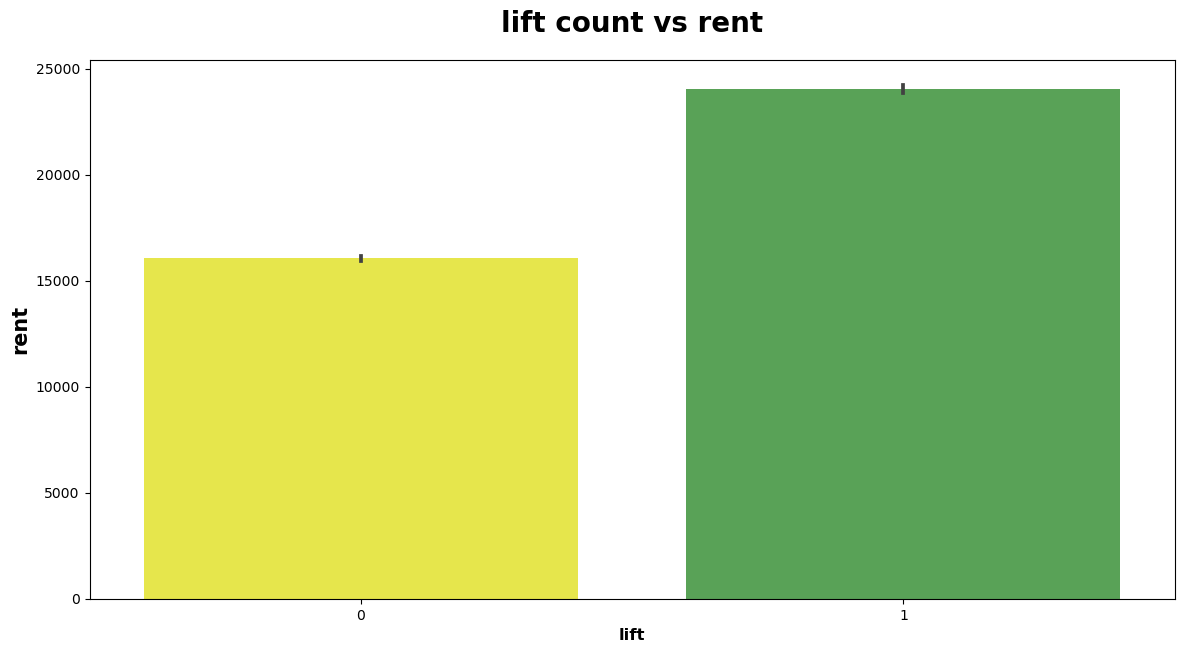

In [48]:
plt.subplots(figsize=(14,7))
sns.barplot(x='lift', y='rent', data=rent,palette="Set1_r")
plt.title("lift count vs rent", weight="bold",fontsize=20, pad=20)
plt.ylabel("rent", weight="bold", fontsize=15)
plt.xlabel("lift", weight="bold", fontsize=12)
plt.show()

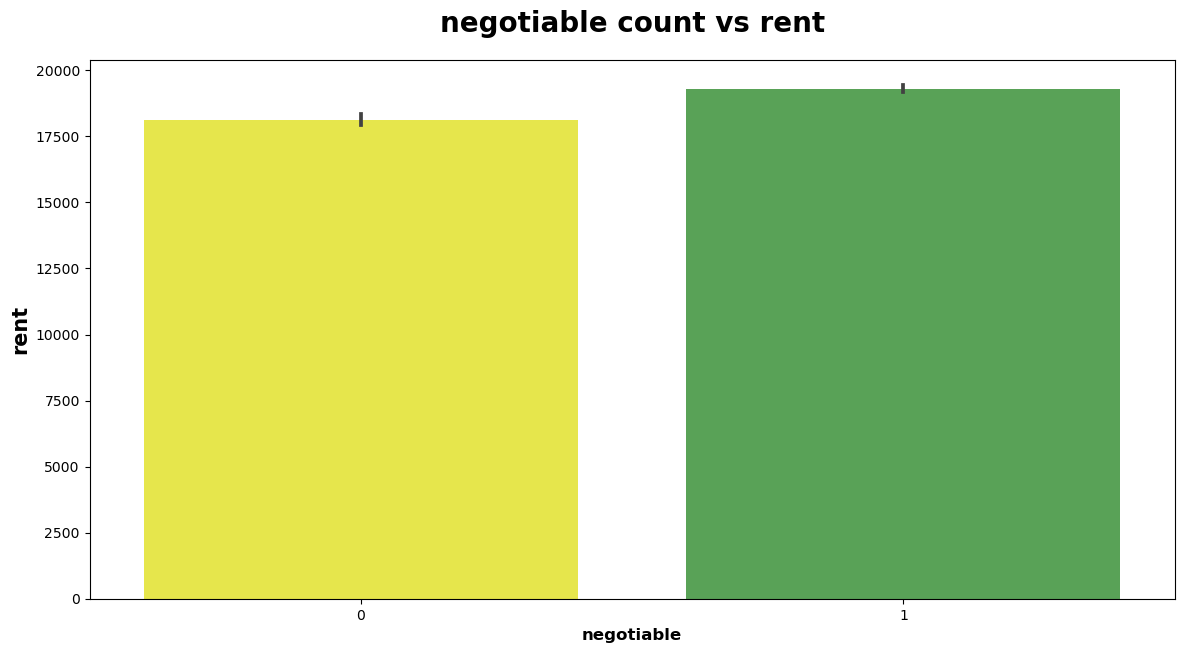

In [49]:
plt.subplots(figsize=(14,7))
sns.barplot(x='negotiable', y='rent', data=rent,palette="Set1_r")
plt.title("negotiable count vs rent", weight="bold",fontsize=20, pad=20)
plt.ylabel("rent", weight="bold", fontsize=15)
plt.xlabel("negotiable", weight="bold", fontsize=12)
plt.show()

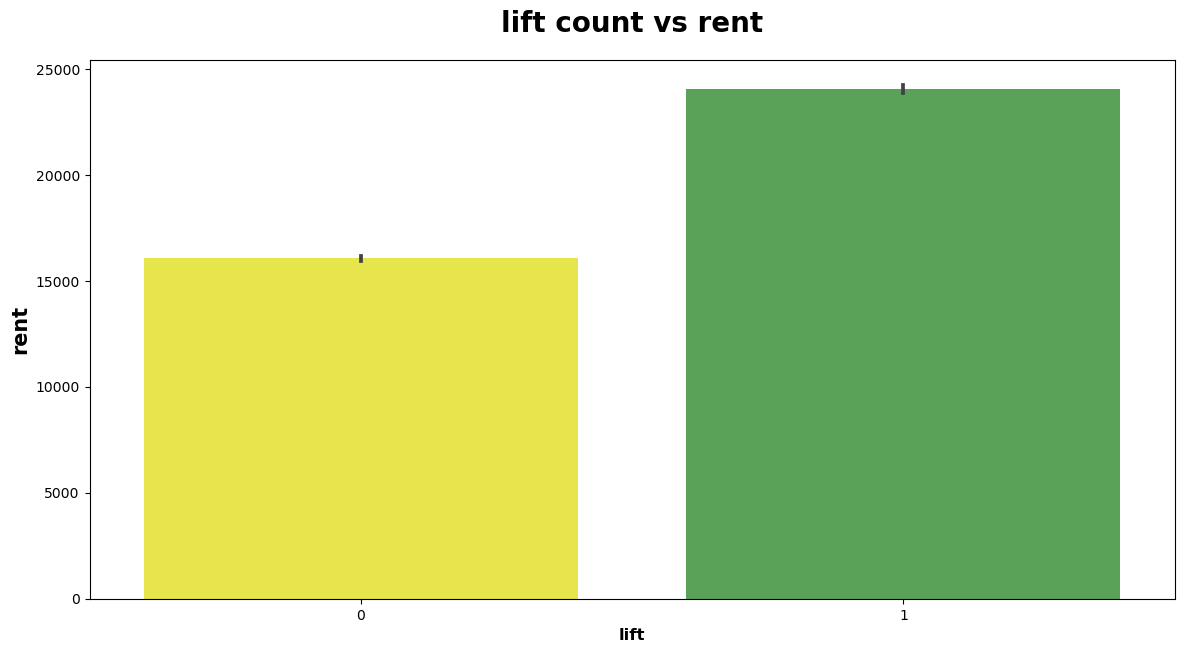

In [50]:
plt.subplots(figsize=(14,7))
sns.barplot(x='lift', y='rent', data=rent,palette="Set1_r")
plt.title("lift count vs rent", weight="bold",fontsize=20, pad=20)
plt.ylabel("rent", weight="bold", fontsize=15)
plt.xlabel("lift", weight="bold", fontsize=12)
plt.show()

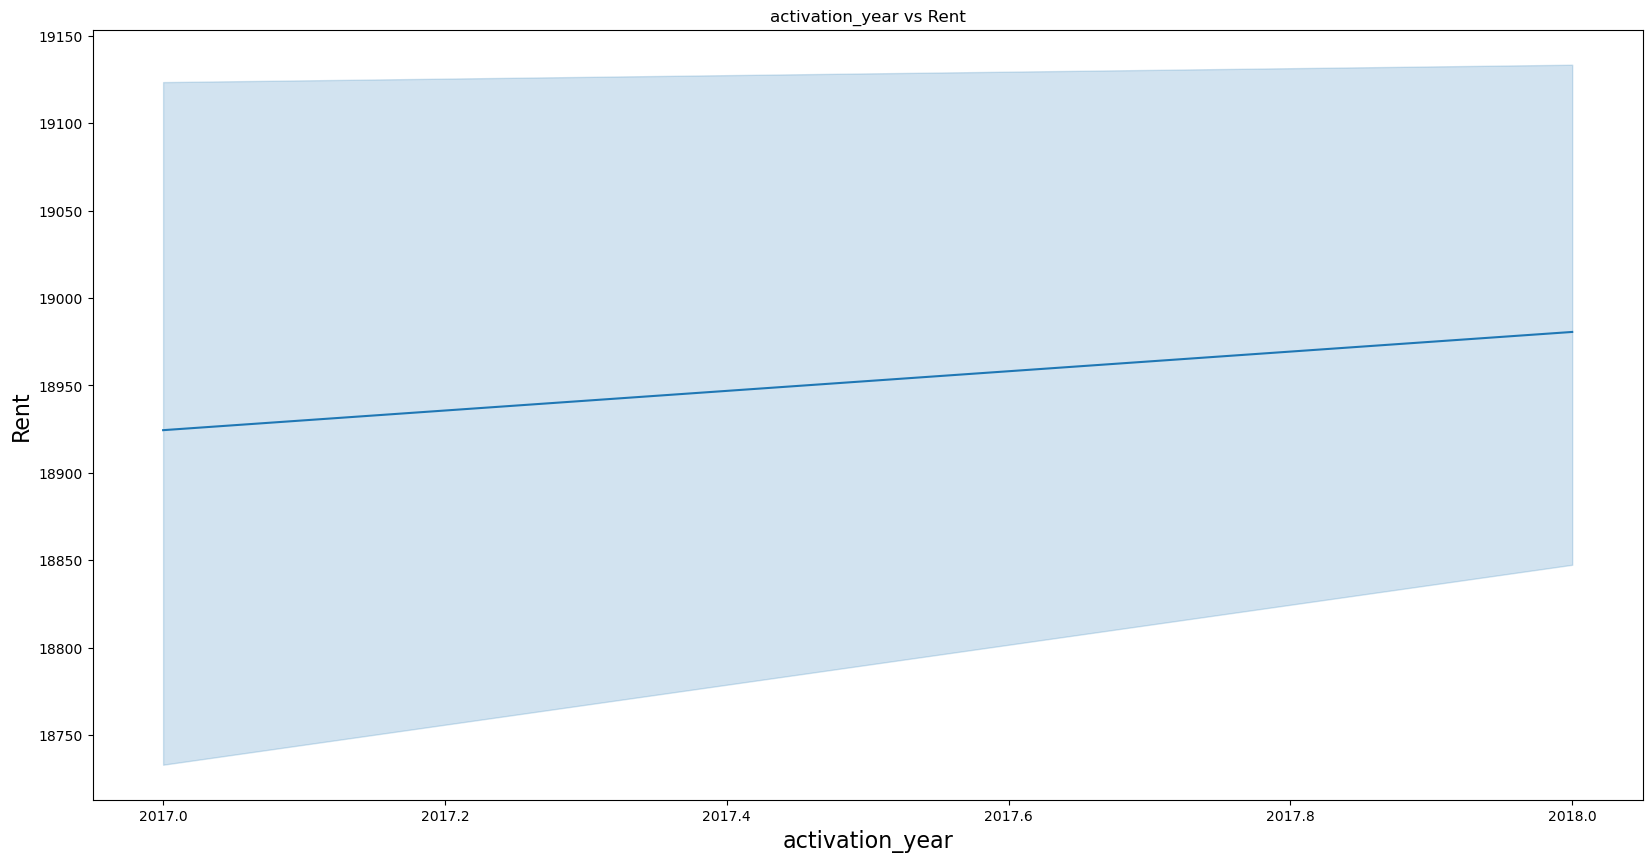

In [51]:
plt.subplots(figsize=(20, 10))
sns.lineplot(x='activation_year', y='rent', data=rent)
plt.title("activation_year vs Rent")
plt.xlabel("activation_year", fontsize=16)
plt.ylabel("Rent",fontsize=16)
plt.show()


In [52]:
#dropping the duplicate features.
rent.drop(['activation_date'],axis = 1,inplace = True)

In [53]:
numerical_final = [feature for feature in rent.columns if rent[feature].dtypes != 'O']
cata_final = [feature for feature in rent.columns if rent[feature].dtypes == 'O']

In [54]:
correlation = rent[numerical_final].corr()
correlation

,latitude,longitude,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,floor,total_floor,balconies,rent,activation_year,activation_month,activation_day
latitude,1.000000,0.293132,0.034965,0.019413,0.034905,-0.009016,0.014948,0.031502,-0.007155,-0.003164,0.004273,-0.000630,0.049573,0.034670,0.033487,-0.007400,-0.004197
longitude,0.293132,1.000000,0.396015,0.332434,0.368374,-0.028469,0.155737,-0.248994,0.138440,-0.006126,0.249716,0.329186,0.271034,0.266766,0.033552,-0.013123,-0.009093
gym,0.034965,0.396015,1.000000,0.645250,0.768926,0.008446,0.394326,-0.207233,0.341081,-0.002620,0.391996,0.525950,0.419374,0.438799,0.007671,-0.016241,-0.005535
lift,0.019413,0.332434,0.645250,1.000000,0.564135,0.010782,0.430519,-0.204663,0.391608,-0.003865,0.404903,0.530371,0.530666,0.472205,-0.010124,-0.014166,-0.001220
swimming_pool,0.034905,0.368374,0.768926,0.564135,1.000000,0.010602,0.383550,-0.193107,0.331826,-0.002193,0.433948,0.574270,0.386577,0.440597,0.006445,-0.008794,0.004721
negotiable,-0.009016,-0.028469,0.008446,0.010782,0.010602,1.000000,0.066473,0.042854,0.060145,0.004694,-0.012540,-0.002278,0.026804,0.064471,0.001610,0.005625,-0.001633
property_size,0.014948,0.155737,0.394326,0.430519,0.383550,0.066473,1.000000,-0.009216,0.776995,-0.003430,0.206534,0.315521,0.510783,0.766144,-0.024918,-0.003000,-0.000934
property_age,0.031502,-0.248994,-0.207233,-0.204663,-0.193107,0.042854,-0.009216,1.000000,-0.045553,0.005760,-0.221114,-0.266498,-0.116954,-0.013948,-0.010880,-0.019758,0.000400
bathroom,-0.007155,0.138440,0.341081,0.391608,0.331826,0.060145,0.776995,-0.045553,1.000000,-0.006752,0.180213,0.278999,0.450239,0.692416,-0.027385,-0.004574,-0.005119
cup_board,-0.003164,-0.006126,-0.002620,-0.003865,-0.002193,0.004694,-0.003430,0.005760,-0.006752,1.000000,-0.002206,-0.003156,-0.006599,-0.001274,0.005417,-0.009400,-0.006545


# 3.Multivariate Analysis:

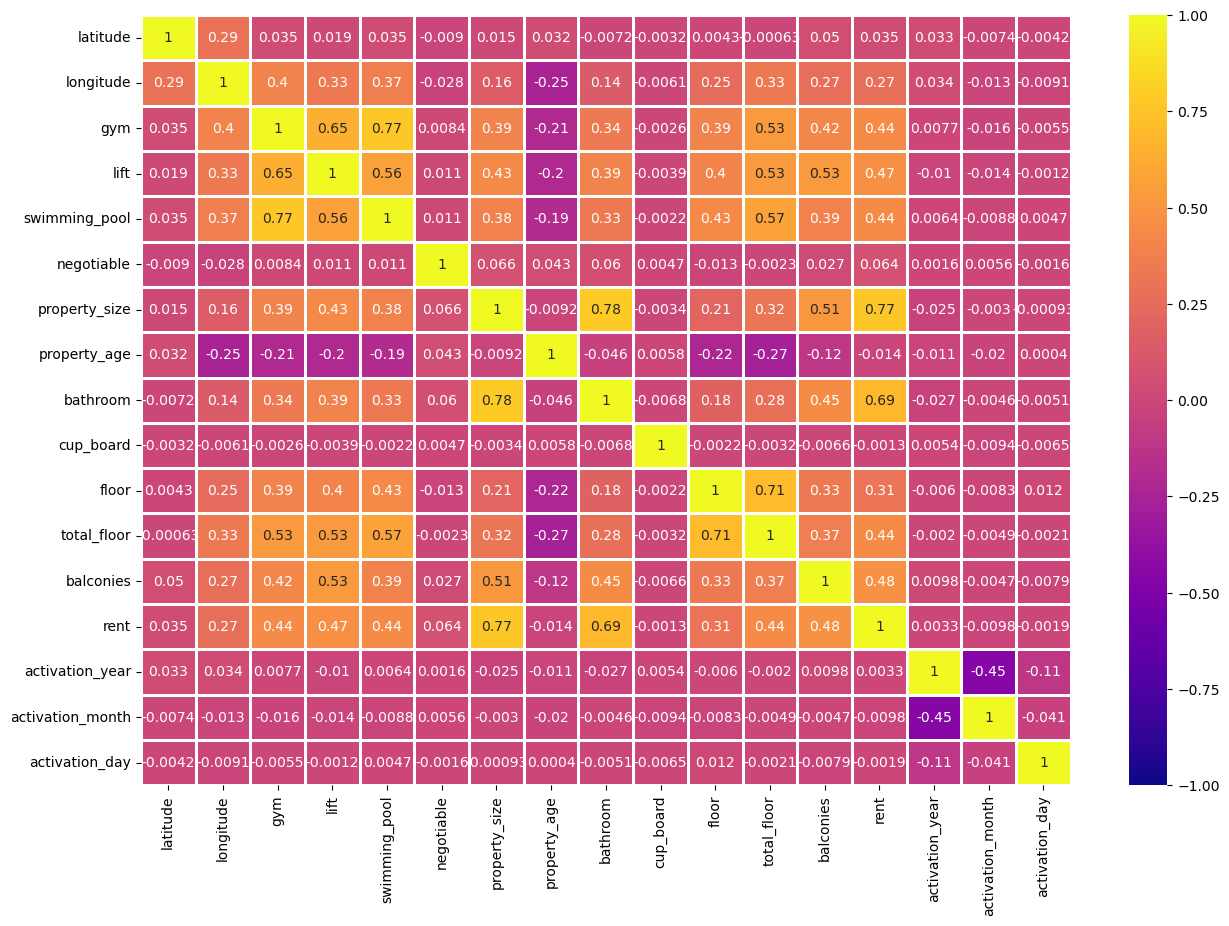

In [55]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation, annot= True, cmap= 'plasma', vmin= -1 , vmax= 1, linecolor='white', linewidths=2)
plt.show()

In [56]:

# convert string dictionary into dictionary

#Extract features from the 'amenities' column
rent['amenities'] = rent['amenities'].apply(lambda x: json.loads(x) if pd.notna(x) else None)

#Expand features into separate columns

rent_feature = pd.concat([rent.drop(['amenities'], axis=1), rent['amenities'].apply(pd.Series)], axis=1)

In [57]:
rent_feature

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,BHK2,Whitefield,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,...,False,True,True,True,False,True,True,False,True,True
1,BHK2,Bellandur,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,...,False,True,True,False,True,True,True,False,True,True
2,BHK3,Thiruvanmiyur,12.982870,77.881030,FAMILY,0,1,0,0,SEMI_FURNISHED,...,False,False,True,False,True,False,False,False,True,True
3,BHK1,Attiguppe,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,...,False,False,False,False,False,False,False,False,False,False
4,BHK3,Kodihalli,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20550,BHK2,Whitefield,12.945748,77.637295,FAMILY,1,1,1,1,SEMI_FURNISHED,...,False,False,False,False,False,False,False,False,False,False
20551,BHK2,Whitefield,12.945748,77.637295,FAMILY,0,0,0,1,SEMI_FURNISHED,...,False,False,False,False,False,False,False,False,False,False
20552,BHK2,Whitefield,12.945748,77.637295,FAMILY,1,1,0,1,SEMI_FURNISHED,...,False,False,False,False,False,False,False,False,False,False
20553,BHK2,Whitefield,12.945748,77.637295,FAMILY,0,1,0,0,SEMI_FURNISHED,...,False,False,False,False,False,False,False,False,False,False


In [58]:
rent_feature.columns

Index(['type', 'locality', 'latitude', 'longitude', 'lease_type', 'gym',
       'lift', 'swimming_pool', 'negotiable', 'furnishing', 'parking',
       'property_size', 'property_age', 'bathroom', 'facing', 'cup_board',
       'floor', 'total_floor', 'water_supply', 'building_type', 'balconies',
       'rent', 'activation_year', 'activation_month', 'activation_day', 'LIFT',
       'GYM', 'INTERNET', 'AC', 'CLUB', 'INTERCOM', 'POOL', 'CPA', 'FS',
       'SERVANT', 'SECURITY', 'SC', 'GP', 'PARK', 'RWH', 'STP', 'HK', 'PB',
       'VP'],
      dtype='object')

In [59]:
rent_feature.isnull().sum()

type                   0
locality               0
latitude               0
longitude              0
lease_type             0
gym                    0
lift                   0
swimming_pool          0
negotiable             0
furnishing             0
parking                0
property_size          0
property_age           0
bathroom               0
facing                 0
cup_board              0
floor                  0
total_floor            0
water_supply           0
building_type          0
balconies              0
rent                   0
activation_year        0
activation_month       0
activation_day         0
LIFT                   0
GYM                   62
INTERNET               0
AC                     0
CLUB                1067
INTERCOM               0
POOL                   0
CPA                 1067
FS                     0
SERVANT             1067
SECURITY               0
SC                     0
GP                  1067
PARK                   0
RWH                 1067


In [60]:
rent_feature['SERVANT'].value_counts()

SERVANT
False    18720
True       768
Name: count, dtype: int64

In [61]:
# handling null values implies mean and mode
rent_feature['CLUB'] = rent_feature['CLUB'].fillna(rent_feature['CLUB'].mode().iloc[0])
rent_feature['CPA'] = rent_feature['lease_type'].fillna(rent_feature['lease_type'].mode().iloc[0])
rent_feature['SERVANT'] = rent_feature['facing'].fillna(rent_feature['facing'].mode().iloc[0])
rent_feature['GP'] = rent_feature['GP'].fillna(rent_feature['GP'].mode().iloc[0])
rent_feature['RWH'] = rent_feature['RWH'].fillna(rent_feature['RWH'].mode().iloc[0])
rent_feature['STP'] = rent_feature['STP'].fillna(rent_feature['STP'].mode().iloc[0])
rent_feature['VP'] = rent_feature['VP'].fillna(rent_feature['VP'].mode().iloc[0])
rent_feature

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,BHK2,Whitefield,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,...,E,True,True,True,False,True,True,False,True,True
1,BHK2,Bellandur,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,...,NE,True,True,False,True,True,True,False,True,True
2,BHK3,Thiruvanmiyur,12.982870,77.881030,FAMILY,0,1,0,0,SEMI_FURNISHED,...,E,False,True,False,True,False,False,False,True,True
3,BHK1,Attiguppe,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,...,E,False,False,False,False,False,False,False,False,False
4,BHK3,Kodihalli,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,...,E,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20550,BHK2,Whitefield,12.945748,77.637295,FAMILY,1,1,1,1,SEMI_FURNISHED,...,E,False,False,False,False,False,False,False,False,False
20551,BHK2,Whitefield,12.945748,77.637295,FAMILY,0,0,0,1,SEMI_FURNISHED,...,E,False,False,False,False,False,False,False,False,False
20552,BHK2,Whitefield,12.945748,77.637295,FAMILY,1,1,0,1,SEMI_FURNISHED,...,E,False,False,False,False,False,False,False,False,False
20553,BHK2,Whitefield,12.945748,77.637295,FAMILY,0,1,0,0,SEMI_FURNISHED,...,E,False,False,False,False,False,False,False,False,False


# 
LIFT: The property has a lift (true) or does not have a lift (false).
GYM: The property has a gym (true) or does not have a gym (false).
INTERNET: The property has internet connectivity (true) or does not have internet (false).
AC: The property has air conditioning (true) or does not have air conditioning (false).
CLUB: The property has a club facility (true) or does not have a club (false).
INTERCOM: The property has an intercom system (true) or does not have an intercom (false).
POOL: The property has a swimming pool (true) or does not have a pool (false).
CPA: The property has a central public address system (true) or does not have one (false).
FS: The property has a fire safety system (true) or does not have one (false).
SERVANT: The property has servant quarters (true) or does not have them (false).
SECURITY: The property has security personnel or a security system (true) or does not have security (false).
SC: The property has a shopping center (true) or does not have one (false).
GP: The property has a grocery store or supermarket nearby (true) or does not have one (false).
PARK: The property has a park nearby (true) or does not have one (false).
RWH: The property has a rainwater


STP (Sewage Treatment Plant): Indicates whether there is a sewage treatment plant on the property.

HK (Housekeeping): Represents the availability of housekeeping services.

PB (Power Backup): Indicates whether the property has a power backup system.

VP (Visitor Parking): Indicates the availability of parking spaces for visitors.

#  Feature engineering:

In [62]:



# Assuming 'rent_feature' is your DataFrame and 'boolean_columns' contains boolean feature names

boolean_columns = ['LIFT','GYM', 'INTERNET', 'AC', 'CLUB', 'INTERCOM', 'POOL', 'CPA', 'FS',
       'SECURITY', 'SC', 'GP', 'PARK', 'RWH', 'STP', 'HK', 'PB',
       'VP']
# Select only the boolean features
boolean_features = rent_feature[boolean_columns]

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the boolean features
one_hot_encoded = encoder.fit_transform(boolean_features)

# Create a DataFrame with one-hot encoded columns
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(boolean_columns))

# Concatenate the one-hot encoded features with the original dataset
rent_feature = pd.concat([rent_feature, one_hot_df], axis=1)

# Drop the original True/False columns if needed
rent_feature = rent_feature.drop(boolean_columns, axis=1)


In [63]:
rent_feature

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,...,FS_True,SECURITY_True,SC_True,GP_True,PARK_True,RWH_True,STP_True,HK_True,PB_True,VP_True
0,BHK2,Whitefield,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
1,BHK2,Bellandur,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
2,BHK3,Thiruvanmiyur,12.982870,77.881030,FAMILY,0,1,0,0,SEMI_FURNISHED,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,BHK1,Attiguppe,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BHK3,Kodihalli,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20550,BHK2,Whitefield,12.945748,77.637295,FAMILY,1,1,1,1,SEMI_FURNISHED,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20551,BHK2,Whitefield,12.945748,77.637295,FAMILY,0,0,0,1,SEMI_FURNISHED,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20552,BHK2,Whitefield,12.945748,77.637295,FAMILY,1,1,0,1,SEMI_FURNISHED,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20553,BHK2,Whitefield,12.945748,77.637295,FAMILY,0,1,0,0,SEMI_FURNISHED,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
correlation_final = rent_feature[numerical_final].corr()
correlation_final

,latitude,longitude,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,floor,total_floor,balconies,rent,activation_year,activation_month,activation_day
latitude,1.000000,0.293132,0.034965,0.019413,0.034905,-0.009016,0.014948,0.031502,-0.007155,-0.003164,0.004273,-0.000630,0.049573,0.034670,0.033487,-0.007400,-0.004197
longitude,0.293132,1.000000,0.396015,0.332434,0.368374,-0.028469,0.155737,-0.248994,0.138440,-0.006126,0.249716,0.329186,0.271034,0.266766,0.033552,-0.013123,-0.009093
gym,0.034965,0.396015,1.000000,0.645250,0.768926,0.008446,0.394326,-0.207233,0.341081,-0.002620,0.391996,0.525950,0.419374,0.438799,0.007671,-0.016241,-0.005535
lift,0.019413,0.332434,0.645250,1.000000,0.564135,0.010782,0.430519,-0.204663,0.391608,-0.003865,0.404903,0.530371,0.530666,0.472205,-0.010124,-0.014166,-0.001220
swimming_pool,0.034905,0.368374,0.768926,0.564135,1.000000,0.010602,0.383550,-0.193107,0.331826,-0.002193,0.433948,0.574270,0.386577,0.440597,0.006445,-0.008794,0.004721
negotiable,-0.009016,-0.028469,0.008446,0.010782,0.010602,1.000000,0.066473,0.042854,0.060145,0.004694,-0.012540,-0.002278,0.026804,0.064471,0.001610,0.005625,-0.001633
property_size,0.014948,0.155737,0.394326,0.430519,0.383550,0.066473,1.000000,-0.009216,0.776995,-0.003430,0.206534,0.315521,0.510783,0.766144,-0.024918,-0.003000,-0.000934
property_age,0.031502,-0.248994,-0.207233,-0.204663,-0.193107,0.042854,-0.009216,1.000000,-0.045553,0.005760,-0.221114,-0.266498,-0.116954,-0.013948,-0.010880,-0.019758,0.000400
bathroom,-0.007155,0.138440,0.341081,0.391608,0.331826,0.060145,0.776995,-0.045553,1.000000,-0.006752,0.180213,0.278999,0.450239,0.692416,-0.027385,-0.004574,-0.005119
cup_board,-0.003164,-0.006126,-0.002620,-0.003865,-0.002193,0.004694,-0.003430,0.005760,-0.006752,1.000000,-0.002206,-0.003156,-0.006599,-0.001274,0.005417,-0.009400,-0.006545


In [65]:

# encoding the categorical features into numerical features

In [66]:
rent_feature['type_numeric'] = rent_feature['type'].map({
    'BHK2': 0,
    'BHK3': 1,
    'BHK1': 2,
    'RK1': 3,
    'BHK4': 4,
    'BHK4PLUS': 5,
    'bhk2': 6,
    'bhk3': 7,
    '1BHK1': 8
})


In [67]:
rent_feature['lease_type_numeric'] = rent_feature['lease_type'].map({
    'FAMILY': 0,
    'ANYONE': 1,
    'BACHELOR': 2,
    'COMPANY': 3
})


In [68]:
rent_feature['furnishing_numeric'] = rent_feature['furnishing'].map({
    'SEMI_FURNISHED': 0,
    'NOT_FURNISHED': 1,
    'FULLY_FURNISHED': 2
})


In [69]:
rent_feature['water_supply_numeric'] = rent['water_supply'].map({
    'CORP_BORE': 0,
    'CORPORATION': 1,
    'BOREWELL': 2
})


In [70]:
rent_feature['building_type_numeric'] = rent_feature['building_type'].map({
    'IF': 0,
    'AP': 1,
    'IH': 2,
    'GC': 3
})


In [71]:
rent_feature['facing_numeic'] = rent_feature['facing'].map({
    
    'E' :1,     
    'N' :2,
    'W' :3,    
    'S' :4,     
    'NE':5,     
    'SE' :6,    
    'NW' :7,   
    'SW' :8      
})

In [72]:
rent_feature['parking_numeric'] = rent_feature['parking'].map({
    
    'BOTH':1,            
    'TWO_WHEELER':2,      
    'FOUR_WHEELER':3,     
    'NONE'        :4 

})
    

In [73]:
rent_feature

,type,locality,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,...,HK_True,PB_True,VP_True,type_numeric,lease_type_numeric,furnishing_numeric,water_supply_numeric,building_type_numeric,facing_numeic,parking_numeric
0,BHK2,Whitefield,12.934471,77.634471,FAMILY,1,1,1,0,SEMI_FURNISHED,...,0.0,1.0,1.0,0,0,0,0,1,1,1
1,BHK2,Bellandur,12.929557,77.672280,ANYONE,0,1,0,1,SEMI_FURNISHED,...,0.0,1.0,1.0,0,1,0,1,1,5,1
2,BHK3,Thiruvanmiyur,12.982870,77.881030,FAMILY,0,1,0,0,SEMI_FURNISHED,...,0.0,1.0,1.0,1,0,0,0,1,1,1
3,BHK1,Attiguppe,12.955991,77.531634,FAMILY,0,0,0,1,SEMI_FURNISHED,...,0.0,0.0,0.0,2,0,0,1,2,1,2
4,BHK3,Kodihalli,12.963903,77.649446,FAMILY,0,0,0,1,SEMI_FURNISHED,...,0.0,0.0,1.0,1,0,0,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20550,BHK2,Whitefield,12.945748,77.637295,FAMILY,1,1,1,1,SEMI_FURNISHED,...,0.0,0.0,0.0,0,0,0,0,0,1,1
20551,BHK2,Whitefield,12.945748,77.637295,FAMILY,0,0,0,1,SEMI_FURNISHED,...,0.0,0.0,0.0,0,0,0,0,0,1,1
20552,BHK2,Whitefield,12.945748,77.637295,FAMILY,1,1,0,1,SEMI_FURNISHED,...,0.0,0.0,0.0,0,0,0,0,0,1,1
20553,BHK2,Whitefield,12.945748,77.637295,FAMILY,0,1,0,0,SEMI_FURNISHED,...,0.0,0.0,0.0,0,0,0,0,0,1,1


In [74]:
pip install category_encoders


Note: you may need to restart the kernel to use updated packages.


In [75]:
import category_encoders as ce
#TargetEncoder encode the 'locality' feature based on the target variable 'rent.
target_encoder = ce.TargetEncoder()
rent_feature['locality_encoded'] = target_encoder.fit_transform(rent_feature['locality'], rent_feature['rent'])


In [76]:
rent_feature.columns

Index(['type', 'locality', 'latitude', 'longitude', 'lease_type', 'gym',
       'lift', 'swimming_pool', 'negotiable', 'furnishing', 'parking',
       'property_size', 'property_age', 'bathroom', 'facing', 'cup_board',
       'floor', 'total_floor', 'water_supply', 'building_type', 'balconies',
       'rent', 'activation_year', 'activation_month', 'activation_day',
       'SERVANT', 'LIFT_True', 'GYM_True', 'GYM_nan', 'INTERNET_True',
       'AC_True', 'CLUB_True', 'INTERCOM_True', 'POOL_True', 'CPA_BACHELOR',
       'CPA_COMPANY', 'CPA_FAMILY', 'FS_True', 'SECURITY_True', 'SC_True',
       'GP_True', 'PARK_True', 'RWH_True', 'STP_True', 'HK_True', 'PB_True',
       'VP_True', 'type_numeric', 'lease_type_numeric', 'furnishing_numeric',
       'water_supply_numeric', 'building_type_numeric', 'facing_numeic',
       'parking_numeric', 'locality_encoded'],
      dtype='object')

In [77]:
rent_feature.drop(['type','locality','lease_type','gym','lift','swimming_pool','furnishing','parking','facing','water_supply','building_type'],axis = 1,inplace = True )

In [78]:
rent_feature

,latitude,longitude,negotiable,property_size,property_age,bathroom,cup_board,floor,total_floor,balconies,...,PB_True,VP_True,type_numeric,lease_type_numeric,furnishing_numeric,water_supply_numeric,building_type_numeric,facing_numeic,parking_numeric,locality_encoded
0,12.934471,77.634471,0,1250.0,23.50000,2.000000,2.000000,6.00000,12.000000,2.000000,...,1.0,1.0,0,0,0,0,1,1,1,20529.919908
1,12.929557,77.672280,1,1400.0,4.00000,2.000000,2.000000,3.00000,4.000000,2.000000,...,1.0,1.0,0,1,0,1,1,5,1,26343.995381
2,12.982870,77.881030,0,1350.0,6.00000,3.000000,3.000000,1.00000,5.000000,3.000000,...,1.0,1.0,1,0,0,0,1,1,1,20136.316027
3,12.955991,77.531634,1,600.0,3.00000,1.000000,1.000000,1.00000,2.000000,0.000000,...,0.0,0.0,2,0,0,1,2,1,2,15603.084228
4,12.963903,77.649446,1,1500.0,15.00000,3.000000,4.000000,0.00000,0.000000,1.000000,...,0.0,1.0,1,0,0,1,2,1,1,20335.092682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20550,12.945748,77.637295,1,1650.0,5.76992,1.858465,4.549922,1.87405,3.801335,1.149523,...,0.0,0.0,0,0,0,0,0,1,1,20529.919908
20551,12.945748,77.637295,1,1000.0,5.76992,1.858465,4.549922,1.87405,3.801335,1.149523,...,0.0,0.0,0,0,0,0,0,1,1,20529.919908
20552,12.945748,77.637295,1,1000.0,5.76992,1.858465,4.549922,1.87405,3.801335,1.149523,...,0.0,0.0,0,0,0,0,0,1,1,20529.919908
20553,12.945748,77.637295,0,1000.0,5.76992,1.858465,4.549922,1.87405,3.801335,1.149523,...,0.0,0.0,0,0,0,0,0,1,1,20529.919908


In [79]:
rent_feature

,latitude,longitude,negotiable,property_size,property_age,bathroom,cup_board,floor,total_floor,balconies,...,PB_True,VP_True,type_numeric,lease_type_numeric,furnishing_numeric,water_supply_numeric,building_type_numeric,facing_numeic,parking_numeric,locality_encoded
0,12.934471,77.634471,0,1250.0,23.50000,2.000000,2.000000,6.00000,12.000000,2.000000,...,1.0,1.0,0,0,0,0,1,1,1,20529.919908
1,12.929557,77.672280,1,1400.0,4.00000,2.000000,2.000000,3.00000,4.000000,2.000000,...,1.0,1.0,0,1,0,1,1,5,1,26343.995381
2,12.982870,77.881030,0,1350.0,6.00000,3.000000,3.000000,1.00000,5.000000,3.000000,...,1.0,1.0,1,0,0,0,1,1,1,20136.316027
3,12.955991,77.531634,1,600.0,3.00000,1.000000,1.000000,1.00000,2.000000,0.000000,...,0.0,0.0,2,0,0,1,2,1,2,15603.084228
4,12.963903,77.649446,1,1500.0,15.00000,3.000000,4.000000,0.00000,0.000000,1.000000,...,0.0,1.0,1,0,0,1,2,1,1,20335.092682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20550,12.945748,77.637295,1,1650.0,5.76992,1.858465,4.549922,1.87405,3.801335,1.149523,...,0.0,0.0,0,0,0,0,0,1,1,20529.919908
20551,12.945748,77.637295,1,1000.0,5.76992,1.858465,4.549922,1.87405,3.801335,1.149523,...,0.0,0.0,0,0,0,0,0,1,1,20529.919908
20552,12.945748,77.637295,1,1000.0,5.76992,1.858465,4.549922,1.87405,3.801335,1.149523,...,0.0,0.0,0,0,0,0,0,1,1,20529.919908
20553,12.945748,77.637295,0,1000.0,5.76992,1.858465,4.549922,1.87405,3.801335,1.149523,...,0.0,0.0,0,0,0,0,0,1,1,20529.919908


In [80]:
#rent_feature.to_excel("C:\\Users\\User\\OneDrive\\Desktop\\guvi\\rent_feature.xlsx", index=False)

In [81]:
rent_feature.columns

Index(['latitude', 'longitude', 'negotiable', 'property_size', 'property_age',
       'bathroom', 'cup_board', 'floor', 'total_floor', 'balconies', 'rent',
       'activation_year', 'activation_month', 'activation_day', 'SERVANT',
       'LIFT_True', 'GYM_True', 'GYM_nan', 'INTERNET_True', 'AC_True',
       'CLUB_True', 'INTERCOM_True', 'POOL_True', 'CPA_BACHELOR',
       'CPA_COMPANY', 'CPA_FAMILY', 'FS_True', 'SECURITY_True', 'SC_True',
       'GP_True', 'PARK_True', 'RWH_True', 'STP_True', 'HK_True', 'PB_True',
       'VP_True', 'type_numeric', 'lease_type_numeric', 'furnishing_numeric',
       'water_supply_numeric', 'building_type_numeric', 'facing_numeic',
       'parking_numeric', 'locality_encoded'],
      dtype='object')

In [82]:
rent_feature.shape

(20555, 44)

In [83]:
rent_feature.dtypes

latitude                 float64
longitude                float64
negotiable                 int64
property_size            float64
property_age             float64
bathroom                 float64
cup_board                float64
floor                    float64
total_floor              float64
balconies                float64
rent                     float64
activation_year            int32
activation_month           int32
activation_day             int32
SERVANT                   object
LIFT_True                float64
GYM_True                 float64
GYM_nan                  float64
INTERNET_True            float64
AC_True                  float64
CLUB_True                float64
INTERCOM_True            float64
POOL_True                float64
CPA_BACHELOR             float64
CPA_COMPANY              float64
CPA_FAMILY               float64
FS_True                  float64
SECURITY_True            float64
SC_True                  float64
GP_True                  float64
PARK_True 

In [84]:
rent_feature['SERVANT'] = rent_feature['SERVANT'].map({
    'E':1,   
    'N':2,     
    'W':3,    
    'S':4,    
    'NE':5,     
    'SE':6,     
    'NW':7,    
    'SW':8     
})

In [85]:


# Assuming df is your DataFrame
correlation_matrix = rent_feature.corr()


In [86]:
# Example: Identify highly correlated features
threshold = 0.8
correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)


In [87]:
rent_feature_filtered = rent_feature.drop(columns=correlated_features)
rent_feature_filtered

,latitude,longitude,negotiable,property_size,property_age,bathroom,cup_board,floor,total_floor,balconies,...,STP_True,HK_True,PB_True,VP_True,type_numeric,furnishing_numeric,water_supply_numeric,building_type_numeric,parking_numeric,locality_encoded
0,12.934471,77.634471,0,1250.0,23.50000,2.000000,2.000000,6.00000,12.000000,2.000000,...,1.0,0.0,1.0,1.0,0,0,0,1,1,20529.919908
1,12.929557,77.672280,1,1400.0,4.00000,2.000000,2.000000,3.00000,4.000000,2.000000,...,1.0,0.0,1.0,1.0,0,0,1,1,1,26343.995381
2,12.982870,77.881030,0,1350.0,6.00000,3.000000,3.000000,1.00000,5.000000,3.000000,...,0.0,0.0,1.0,1.0,1,0,0,1,1,20136.316027
3,12.955991,77.531634,1,600.0,3.00000,1.000000,1.000000,1.00000,2.000000,0.000000,...,0.0,0.0,0.0,0.0,2,0,1,2,2,15603.084228
4,12.963903,77.649446,1,1500.0,15.00000,3.000000,4.000000,0.00000,0.000000,1.000000,...,0.0,0.0,0.0,1.0,1,0,1,2,1,20335.092682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20550,12.945748,77.637295,1,1650.0,5.76992,1.858465,4.549922,1.87405,3.801335,1.149523,...,0.0,0.0,0.0,0.0,0,0,0,0,1,20529.919908
20551,12.945748,77.637295,1,1000.0,5.76992,1.858465,4.549922,1.87405,3.801335,1.149523,...,0.0,0.0,0.0,0.0,0,0,0,0,1,20529.919908
20552,12.945748,77.637295,1,1000.0,5.76992,1.858465,4.549922,1.87405,3.801335,1.149523,...,0.0,0.0,0.0,0.0,0,0,0,0,1,20529.919908
20553,12.945748,77.637295,0,1000.0,5.76992,1.858465,4.549922,1.87405,3.801335,1.149523,...,0.0,0.0,0.0,0.0,0,0,0,0,1,20529.919908


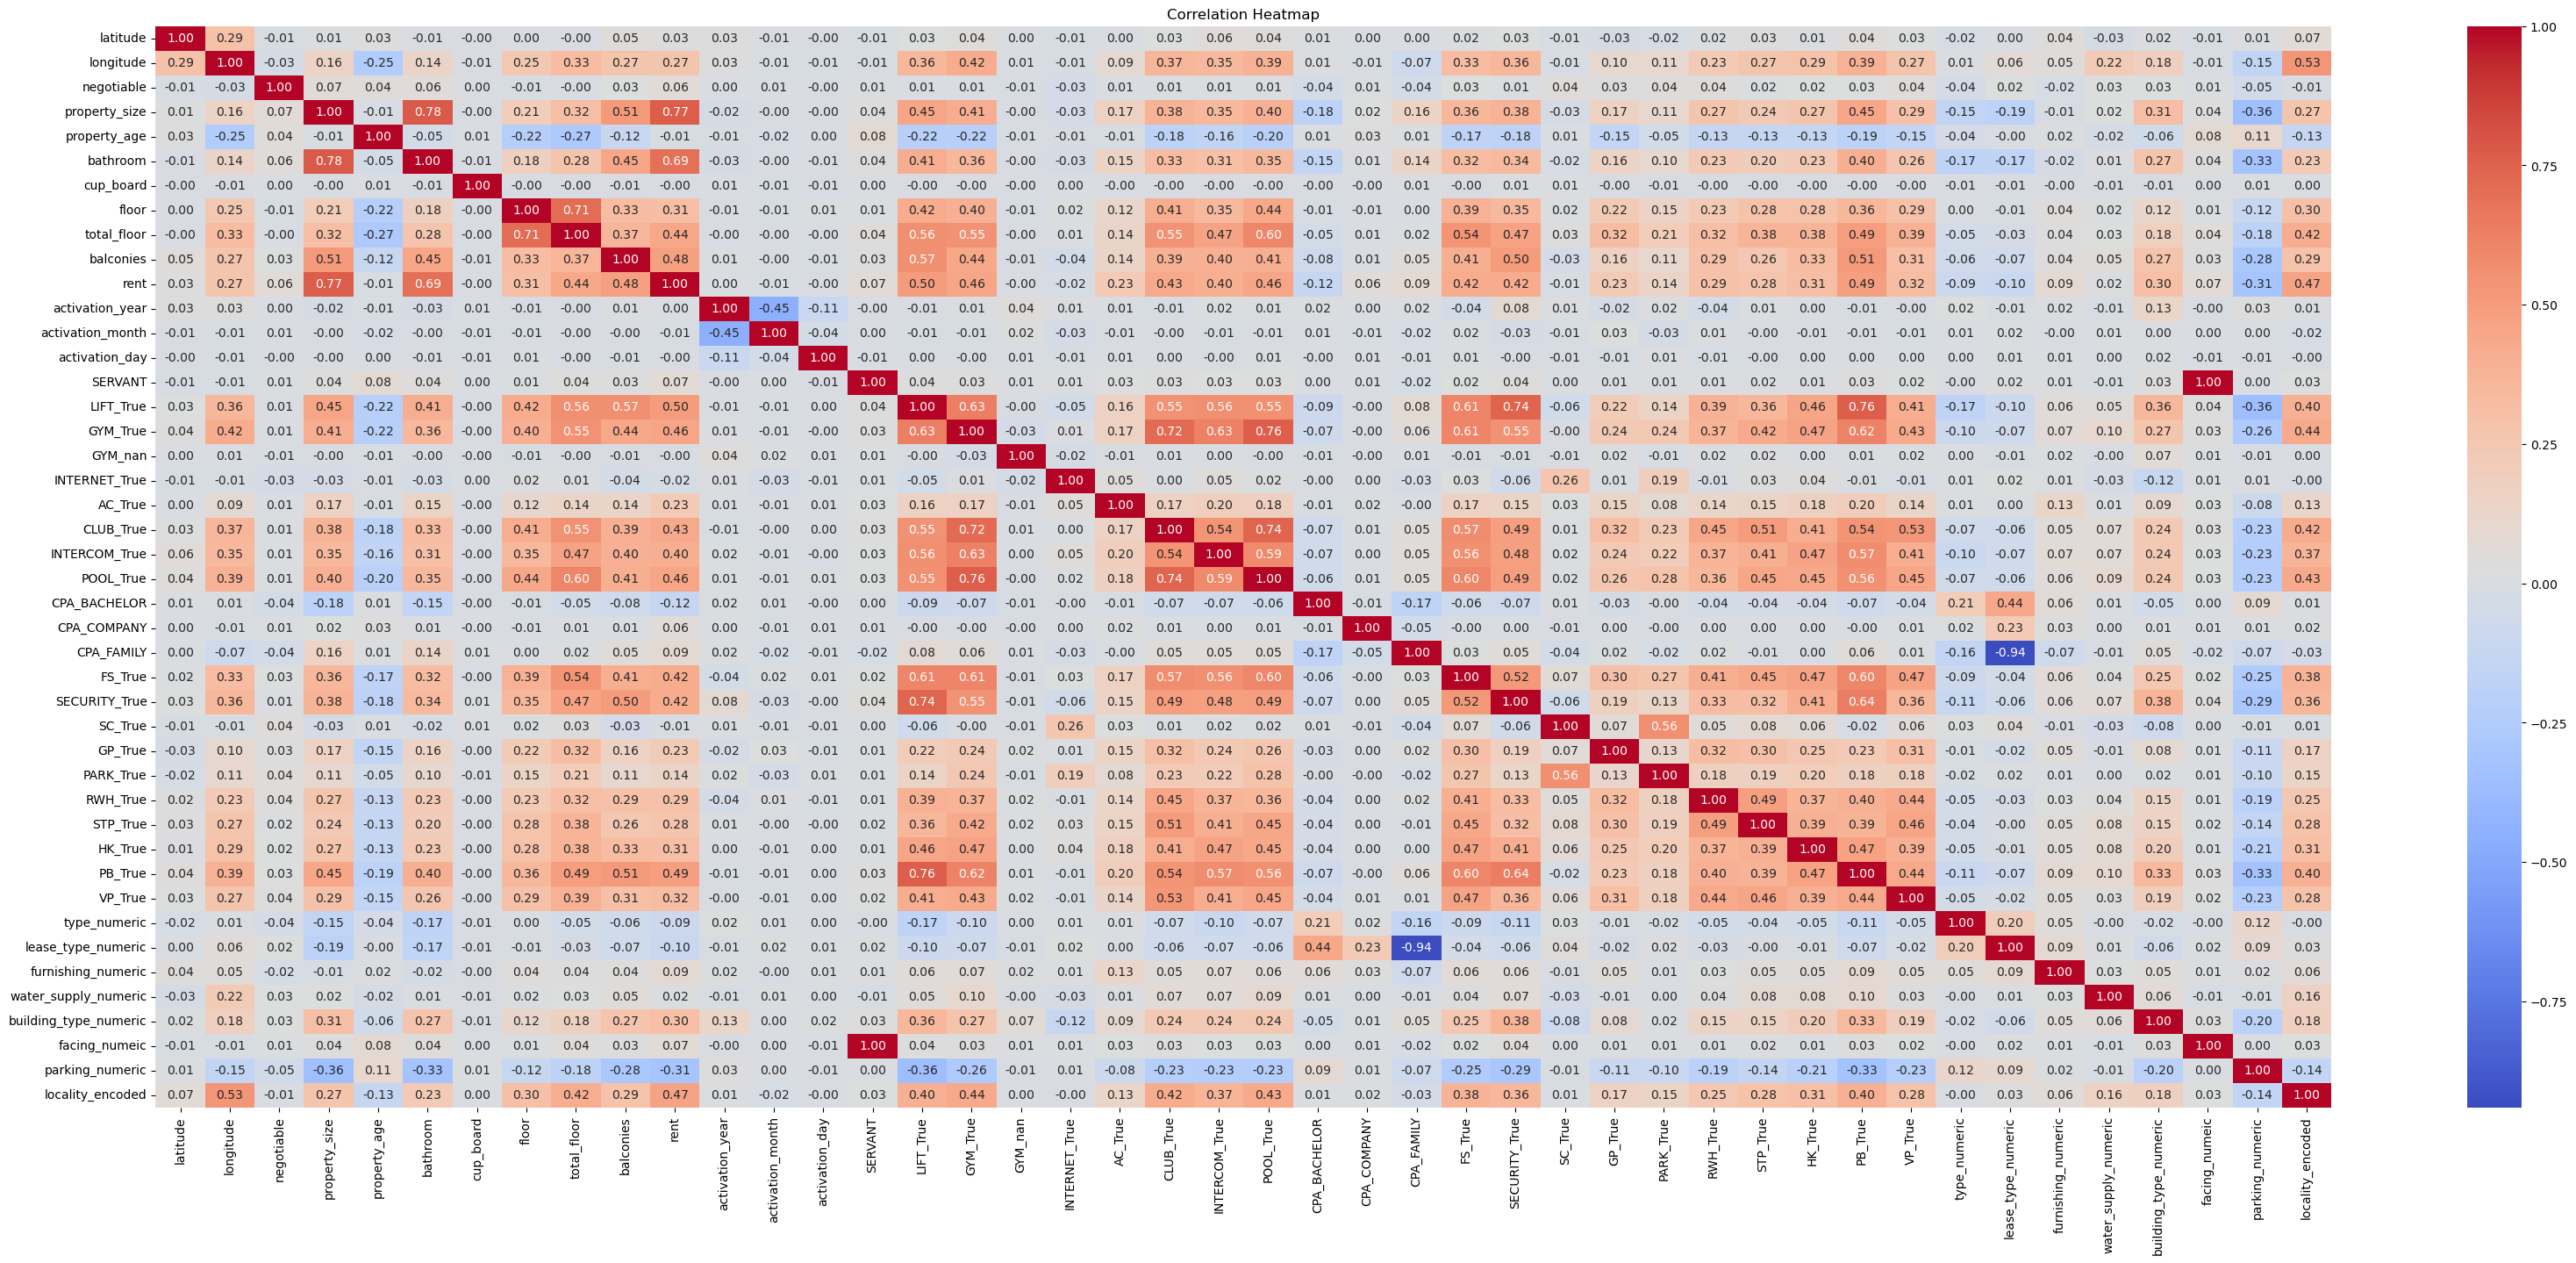

In [88]:
plt.figure(figsize=(40, 16))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [89]:
rent_feature_filtered.shape

(20555, 42)

In [90]:
rent_feature_filtered.columns

Index(['latitude', 'longitude', 'negotiable', 'property_size', 'property_age',
       'bathroom', 'cup_board', 'floor', 'total_floor', 'balconies', 'rent',
       'activation_year', 'activation_month', 'activation_day', 'SERVANT',
       'LIFT_True', 'GYM_True', 'GYM_nan', 'INTERNET_True', 'AC_True',
       'CLUB_True', 'INTERCOM_True', 'POOL_True', 'CPA_BACHELOR',
       'CPA_COMPANY', 'CPA_FAMILY', 'FS_True', 'SECURITY_True', 'SC_True',
       'GP_True', 'PARK_True', 'RWH_True', 'STP_True', 'HK_True', 'PB_True',
       'VP_True', 'type_numeric', 'furnishing_numeric', 'water_supply_numeric',
       'building_type_numeric', 'parking_numeric', 'locality_encoded'],
      dtype='object')

In [91]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Assuming 'data' is your DataFrame with the features
# Select only the features related to rent
rent_features = rent_feature[['latitude', 'longitude', 'negotiable', 'property_size', 'property_age',
                      'bathroom', 'cup_board', 'floor', 'total_floor', 'balconies', 'rent',
                      'activation_year', 'activation_month', 'activation_day', 'SERVANT',
                      'LIFT_True', 'GYM_True', 'GYM_nan', 'INTERNET_True', 'AC_True',
                      'CLUB_True', 'INTERCOM_True', 'POOL_True', 'CPA_BACHELOR',
                      'CPA_COMPANY', 'CPA_FAMILY', 'FS_True', 'SECURITY_True', 'SC_True',
                      'GP_True', 'PARK_True', 'RWH_True', 'STP_True', 'HK_True', 'PB_True',
                      'VP_True', 'type_numeric', 'lease_type_numeric', 'furnishing_numeric',
                      'water_supply_numeric', 'building_type_numeric', 'facing_numeic',
                      'parking_numeric', 'locality_encoded']]


# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_rent_features = scaler.fit_transform(rent_features)

# Choose the number of principal components
n_components = 12  

# Apply PCA
pca = PCA(n_components = n_components)
pca_result = pca.fit_transform(scaled_rent_features)

# Create a DataFrame with the principal components
columns = [f'PC{i+1}' for i in range(n_components)]
pca_df = pd.DataFrame(data=pca_result, columns=columns)

# Concatenate the principal components with the 'rent' column if needed
final_rent_data = pd.concat([rent_feature[['rent']], pca_df], axis=1)

# Display the result
print(final_rent_data.head())


      rent       PC1       PC2       PC3       PC4       PC5       PC6  \
0  40000.0  6.295229 -0.668753 -1.065668 -1.554569  0.087621  0.211878   
1  22000.0  2.592965  0.750216  3.360375 -0.151110  0.338938 -1.472008   
2  28000.0  1.770220 -1.575456 -1.024153  0.913085  0.700221  0.386106   
3   8000.0 -3.131108 -0.919364 -1.404653  0.871505 -1.726097  0.092084   
4  41250.0 -0.115865 -2.929887 -0.237993  1.447787  2.138778  1.126989   

        PC7       PC8       PC9      PC10      PC11      PC12  
0  1.928865  0.147091  1.384567  1.531280  0.784755 -1.362670  
1 -0.581298  0.741053 -1.874976  0.805634 -1.211861  0.236351  
2 -2.535182 -0.297558 -0.020536 -0.398516 -2.594107 -1.560774  
3  1.153441  0.587651 -0.295282 -0.342479 -0.613849  1.396664  
4 -0.682656  1.641213  0.438915  1.440465 -1.213737  0.345420  


# Model Building:

In [92]:
final_rent_data

,rent,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,40000.000000,6.295229,-0.668753,-1.065668,-1.554569,0.087621,0.211878,1.928865,0.147091,1.384567,1.531280,0.784755,-1.362670
1,22000.000000,2.592965,0.750216,3.360375,-0.151110,0.338938,-1.472008,-0.581298,0.741053,-1.874976,0.805634,-1.211861,0.236351
2,28000.000000,1.770220,-1.575456,-1.024153,0.913085,0.700221,0.386106,-2.535182,-0.297558,-0.020536,-0.398516,-2.594107,-1.560774
3,8000.000000,-3.131108,-0.919364,-1.404653,0.871505,-1.726097,0.092084,1.153441,0.587651,-0.295282,-0.342479,-0.613849,1.396664
4,41250.000000,-0.115865,-2.929887,-0.237993,1.447787,2.138778,1.126989,-0.682656,1.641213,0.438915,1.440465,-1.213737,0.345420
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20550,19056.733148,-1.399909,-2.069770,-1.021852,0.295580,0.505371,-0.474370,-0.411548,-0.470205,0.694028,1.241322,-0.013175,-1.128338
20551,19056.733148,-1.697514,-1.656358,-1.161750,0.125616,0.009890,-0.484845,-0.361542,-0.418686,0.566716,1.066724,0.158851,-1.113231
20552,19056.733148,-1.697514,-1.656358,-1.161750,0.125616,0.009890,-0.484845,-0.361542,-0.418686,0.566716,1.066724,0.158851,-1.113231
20553,19056.733148,-1.722630,-1.606497,-1.253613,0.140751,-0.382508,-0.468581,-0.519842,-0.953447,1.006756,0.507391,-0.002895,-1.295544


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import pickle


In [96]:
X = final_rent_data.drop(['rent'],axis =1)
y = final_rent_data['rent']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)


print("R-squared (R2) Score - Training Set:", r2_train)
print("R-squared (R2) Score - Testing Set:", r2_test)

R-squared (R2) Score - Training Set: 0.8305007377204446
R-squared (R2) Score - Testing Set: 0.8312599462248637


In [97]:
#Fine-Tune Hyperparameters:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

parameters = {'alpha': [0.1, 1, 10]}  

ridge_model = Ridge()

grid_search = GridSearchCV(ridge_model, parameters, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
best_ridge_model = Ridge(alpha=best_alpha)

best_ridge_model.fit(X_train, y_train)

# Now you can use best_ridge_model for predictions


Ridge(alpha=10)

In [98]:

# Assuming X_train, X_test, y_train, y_test are defined
alpha_value = 10

ridge_model = Ridge(alpha=alpha_value)
ridge_model.fit(X_train, y_train)

# Make predictions on training and testing sets
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)


r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
r2_train,r2_test


(0.8305006761132431, 0.8312619913249257)

In [99]:

# Assuming X_train, X_test, y_train, y_test are defined
alpha_value = 10

ridge_model = Ridge(alpha=alpha_value)
ridge_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = ridge_model.predict(X_test)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
# Assuming y_test and y_pred are defined (predictions from your model)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Display the metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 11047562.360406449
Mean Absolute Error (MAE): 2542.5227361041234
Root Mean Squared Error (RMSE): 3323.7873518633


In [100]:
user_data = np.array([[6.133028,-0.251114,-0.522018,-1.109600,1.250939,0.166297,-3.594697,1.222603,1.121108,1.486635,0.832200,1.050082
]])
y_p = ridge_model.predict(user_data)
print(y_p[0])

36258.25386048441


In [101]:

# X contains the features, y contains the target variable
X = final_rent_data.drop(['rent'],axis =1)
y = final_rent_data['rent']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("R-squared (R2) Score - Training Set:", r2_train)
print("R-squared (R2) Score - Testing Set:", r2_test)

R-squared (R2) Score - Training Set: 0.8989802875270573
R-squared (R2) Score - Testing Set: 0.8370150183565959


In [102]:
# fine tuning with hyperparameters XGB Bosst ml algorithms: 
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=42)

grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='r2', cv=3)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Make predictions with the best model
best_model = grid_search.best_estimator_
y_test_pred_best = best_model.predict(X_test)


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}


In [103]:


# Create and train and test  the final XGBoost model with the best hyperparameters
XGB_final_model = XGBRegressor(objective='reg:squarederror',
                               n_estimators=150,
                               learning_rate=0.2,
                               max_depth=5,
                               random_state=42)

XGB_final_model.fit(X_train, y_train)

# Make predictions on training and testing sets
y_train_pred = XGB_final_model.predict(X_train)
y_test_pred = XGB_final_model.predict(X_test)

# Evaluate the model
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
r2_train,r2_test


(0.909018525248603, 0.8325624850909729)

In [104]:


# Create a final XGBoost model and  Evaluate the model with the best hyperparameters
XGB_final_model = XGBRegressor(objective='reg:squarederror',
                               n_estimators=150,
                               learning_rate=0.2,
                               max_depth=5,
                               random_state=42)

XGB_final_model.fit(X_train, y_train)



XGB_final_model.fit(X_train,y_train)

y_pred_train = XGB_final_model.predict(X_train)
y_pred_test = XGB_final_model.predict(X_test)                      
print('Mean Squared Error:' ,mean_squared_error(y_test,y_pred_test))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_test))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print(r2_score(y_test,y_pred_test))


Mean Squared Error: 10962416.837518413
Mean Absolute Error: 2509.8359123806995
Root Mean Squared Error: 3310.9540675639723
0.8325624850909729


In [105]:
user_data = np.array([[6.133028,-0.251114,-0.522018,-1.109600,1.250939,0.166297,-3.594697,1.222603,1.121108,1.486635,0.832200,1.050082
]])
y_p = XGB_final_model.predict(user_data)
print(y_p[0])

36496.79


In [106]:
# save the regression model by using pickle

with open("C:\\Users\\User\\OneDrive\\Desktop\\fair_project2\\rent_regression_model.pkl", 'wb') as f:
    pickle.dump(model, f)

In [107]:
# load the pickle model

with open("C:\\Users\\User\\OneDrive\\Desktop\\fair_project2\\rent_regression_model.pkl", 'rb') as f:
    model = pickle.load(f)


In [108]:
user_data = np.array([[6.133028,-0.251114,-0.522018,-1.109600,1.250939,0.166297,-3.594697,1.222603,1.121108,1.486635,0.832200,1.050082
]])
y_p = model.predict(user_data)
print(y_p[0])

36669.586
